In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Affichage des versions des bibliothèques utilisées
print('Version Python ------------------- ' , sys.version)
print('Version NumPy ------------------- ' , np.version.full_version)
print('Version Pandas ------------------- ' , pd.__version__)
print('Version Seaborn  ------------------- ' , sns.__version__)


Version Python -------------------  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Version NumPy -------------------  1.21.5
Version Pandas -------------------  1.4.4
Version Seaborn  -------------------  0.13.0


In [3]:
def cle_test(df,cols):
    for i in cols:
        if df.size == df.drop_duplicates(cols).size:
            print('la clé est unique')
        else:
            print('la clé n\'est pas unique')

# Explorations des jeux de donnèes

## EdStatsCountry-Series

In [4]:
Country_series= pd.read_csv('EdStatsCountry-Series.csv')
Country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [5]:
Country_series.shape

(613, 4)

In [6]:
Country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [7]:
Country_series.describe(include='all')

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
count,613,613,613,0.0
unique,211,21,97,NaN
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
freq,18,211,154,NaN
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN


 On constate qu’il y’a 211 pays unique

In [8]:
Country_series.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [9]:
Country_series.duplicated().sum()

0

In [10]:
cle_test(Country_series,['CountryCode'])

la clé n'est pas unique


## EdStatsCountry

In [11]:
Country = pd.read_csv('EdStatsCountry.csv')
Country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [12]:
Country.shape

(241, 32)

In [13]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [14]:
Country.describe(include='all')

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
count,241,241,241,241,238,215,145,214,214,240,...,181,213,141,160,111,142,107.000000,185.000000,179,0.0
unique,241,241,241,241,238,152,131,7,5,240,...,2,27,60,75,2,35,NaN,NaN,20,NaN
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,...,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000,NaN
freq,1,1,1,1,1,23,6,57,55,1,...,110,59,10,15,110,36,NaN,NaN,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.616834,2.569675,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007.500000,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN


In [15]:
Country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [16]:
Country = Country.drop("Unnamed: 31", axis=1)

In [17]:
Country.duplicated().sum()

0

In [18]:
cle_test(Country,['Country Code'])

la clé est unique


In [19]:
#On ne retrouve pas le même nombre de pays dans Country_series que dans Country!
Country[~Country['Country Code'].isin(Country_series['CountryCode'].unique())][['Short Name']]

,Short Name
5,Arab World
47,Curaçao
57,East Asia & Pacific (developing only)
58,East Asia & Pacific (all income levels)
59,Europe & Central Asia (developing only)
60,Europe & Central Asia (all income levels)
63,Euro area
68,European Union
89,High income
92,Heavily indebted poor countries (HIPC)


## EdStatsData

In [20]:
data = pd.read_csv('EdStatsData.csv')
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.shape

(886930, 70)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [23]:
data.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,886930,886930,886930,886930,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,NaN,NaN,NaN,NaN,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,NaN,NaN,NaN,NaN,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,NaN,NaN,NaN,NaN,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,NaN,NaN,NaN,NaN,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN


In [24]:
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [25]:
data = data.drop("Unnamed: 69", axis=1)

In [26]:
data.duplicated().sum()

0

In [27]:
cle_test(Country,['Country Code'])

la clé est unique


## EdStatsFootNote

In [28]:
foot = pd.read_csv('EdStatsFootNote.csv')
foot.head(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [29]:
foot.describe(include='all')

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
count,643638,643638,643638,643638,0.0
unique,239,1558,56,9102,NaN
top,LIC,SH.DYN.MORT,YR2004,Country Data,NaN
freq,7320,9226,27128,191188,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


In [30]:
foot.shape

(643638, 5)

## EdStatsSeries

In [31]:
series = pd.read_csv('EdStatsSeries.csv')
series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
series.shape

(3665, 21)

In [33]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [34]:
series.describe(include='all')

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,...,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,...,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,...,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

# Jointure  EdStatsData et EdStatsCountry

data et Country pour récupérer la région pour chaque pays 

In [36]:
data_country = pd.merge(data,Country, on='Country Code', how='outer', indicator=True)
data_country ['_merge'].value_counts()

both          883265
left_only       3665
right_only         0
Name: _merge, dtype: int64

In [37]:
data_country = data_country[data_country["_merge"] == "both"].drop("_merge", axis=1)
data_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data_country.shape

(883265, 99)

In [39]:
data_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 886929
Data columns (total 99 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Country Name                                       883265 non-null  object 
 1   Country Code                                       883265 non-null  object 
 2   Indicator Name                                     883265 non-null  object 
 3   Indicator Code                                     883265 non-null  object 
 4   1970                                               72278 non-null   float64
 5   1971                                               35508 non-null   float64
 6   1972                                               35594 non-null   float64
 7   1973                                               35514 non-null   float64
 8   1974                                               35708 non-null   float6

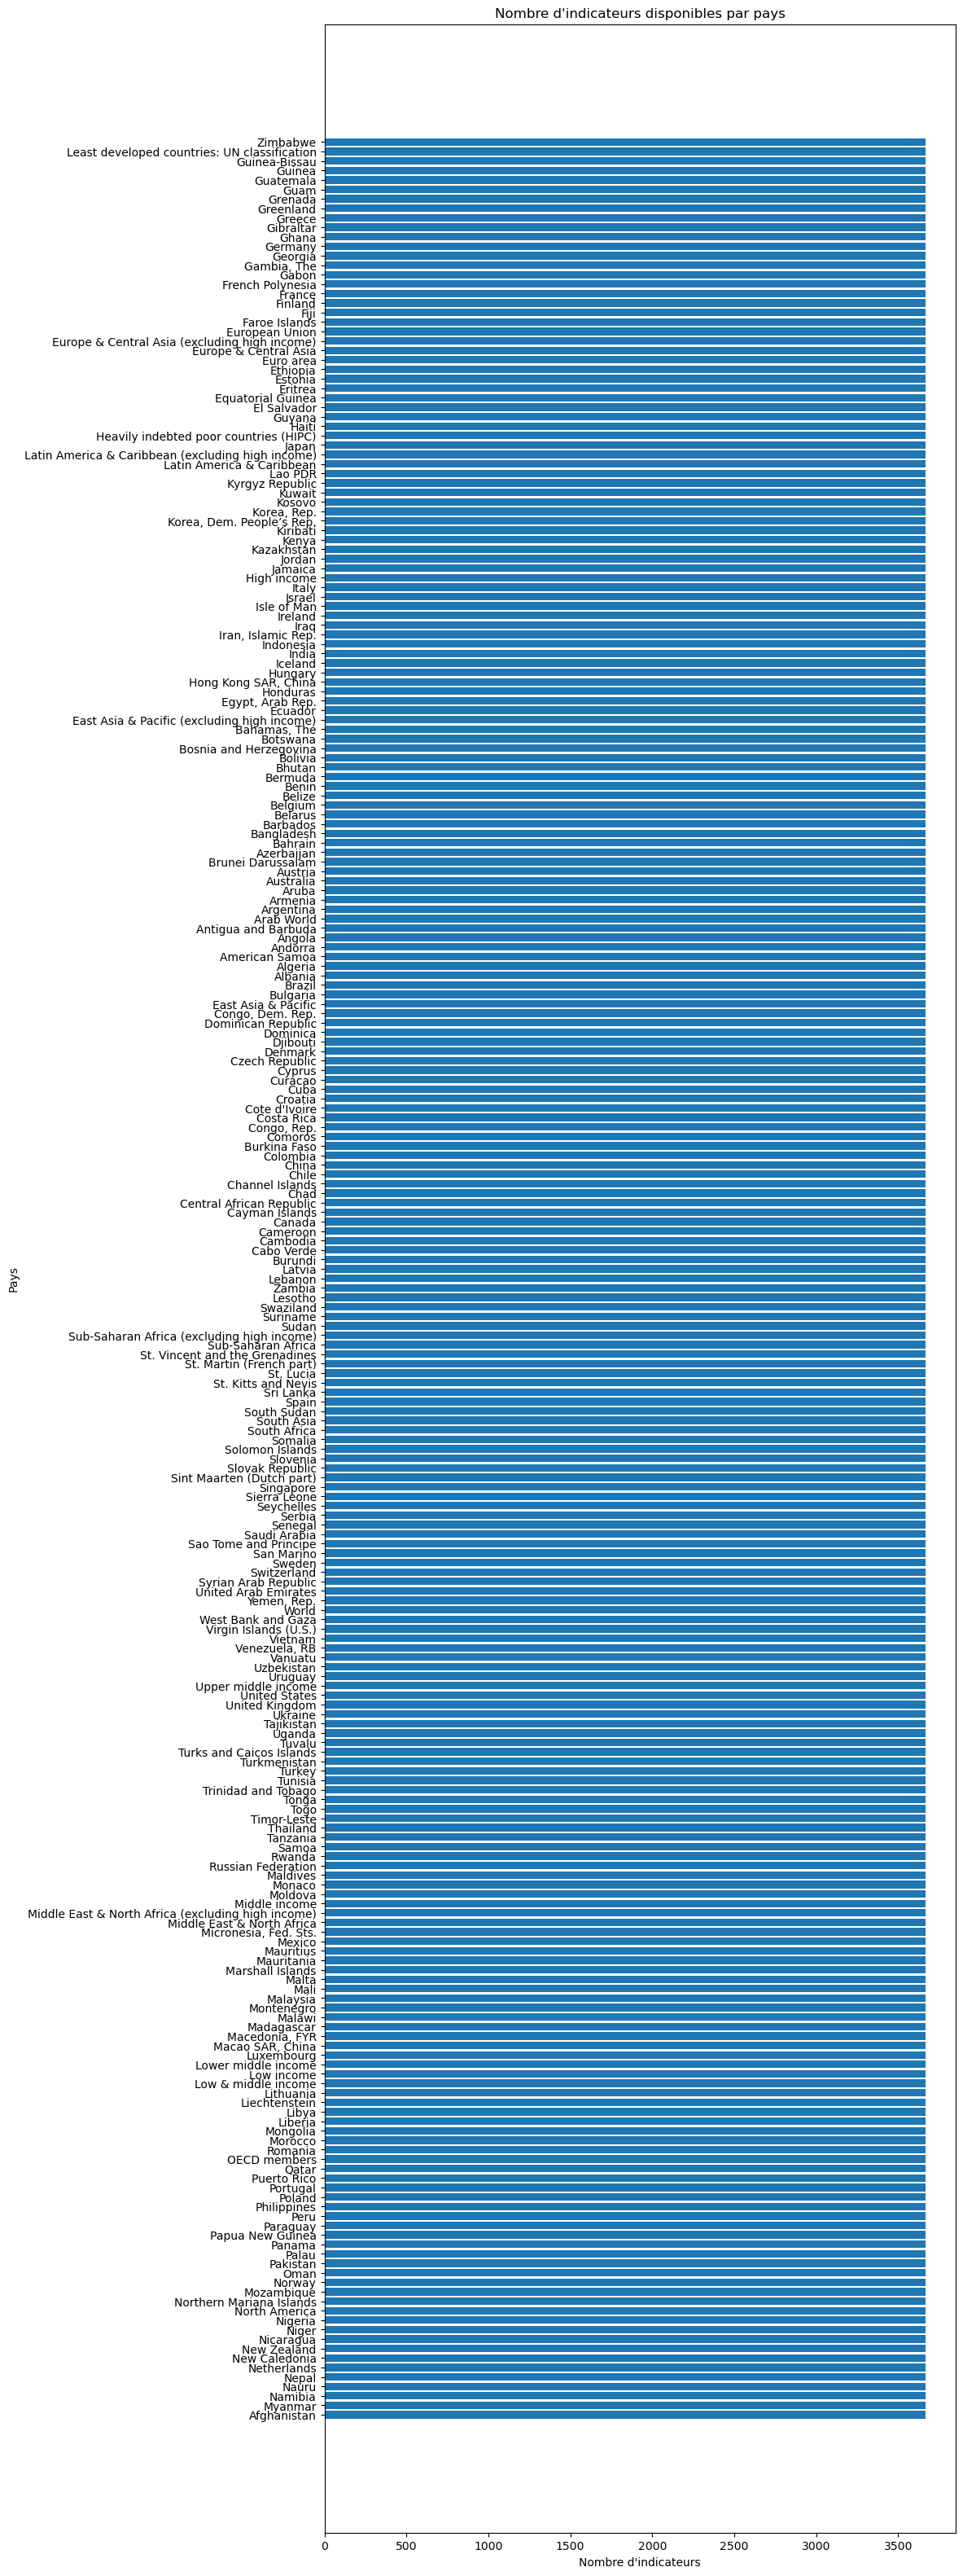

In [40]:
# Regroupement des données par 'Country Name' et on compte le nombre d'indicateurs pour chaque pays et on Trie les données par le nombre d'indicateurs de manière décroissante
country_counts = data_country.groupby('Country Name')['Indicator Code'].count().reset_index().sort_values(by='Indicator Code', ascending=True)

# le graphique à barres horizontales
plt.figure(figsize=(10, 40))  
plt.barh(country_counts['Country Name'], country_counts['Indicator Code'])

plt.title("Nombre d'indicateurs disponibles par pays")
plt.xlabel("Nombre d'indicateurs")
plt.ylabel("Pays")

plt.show()


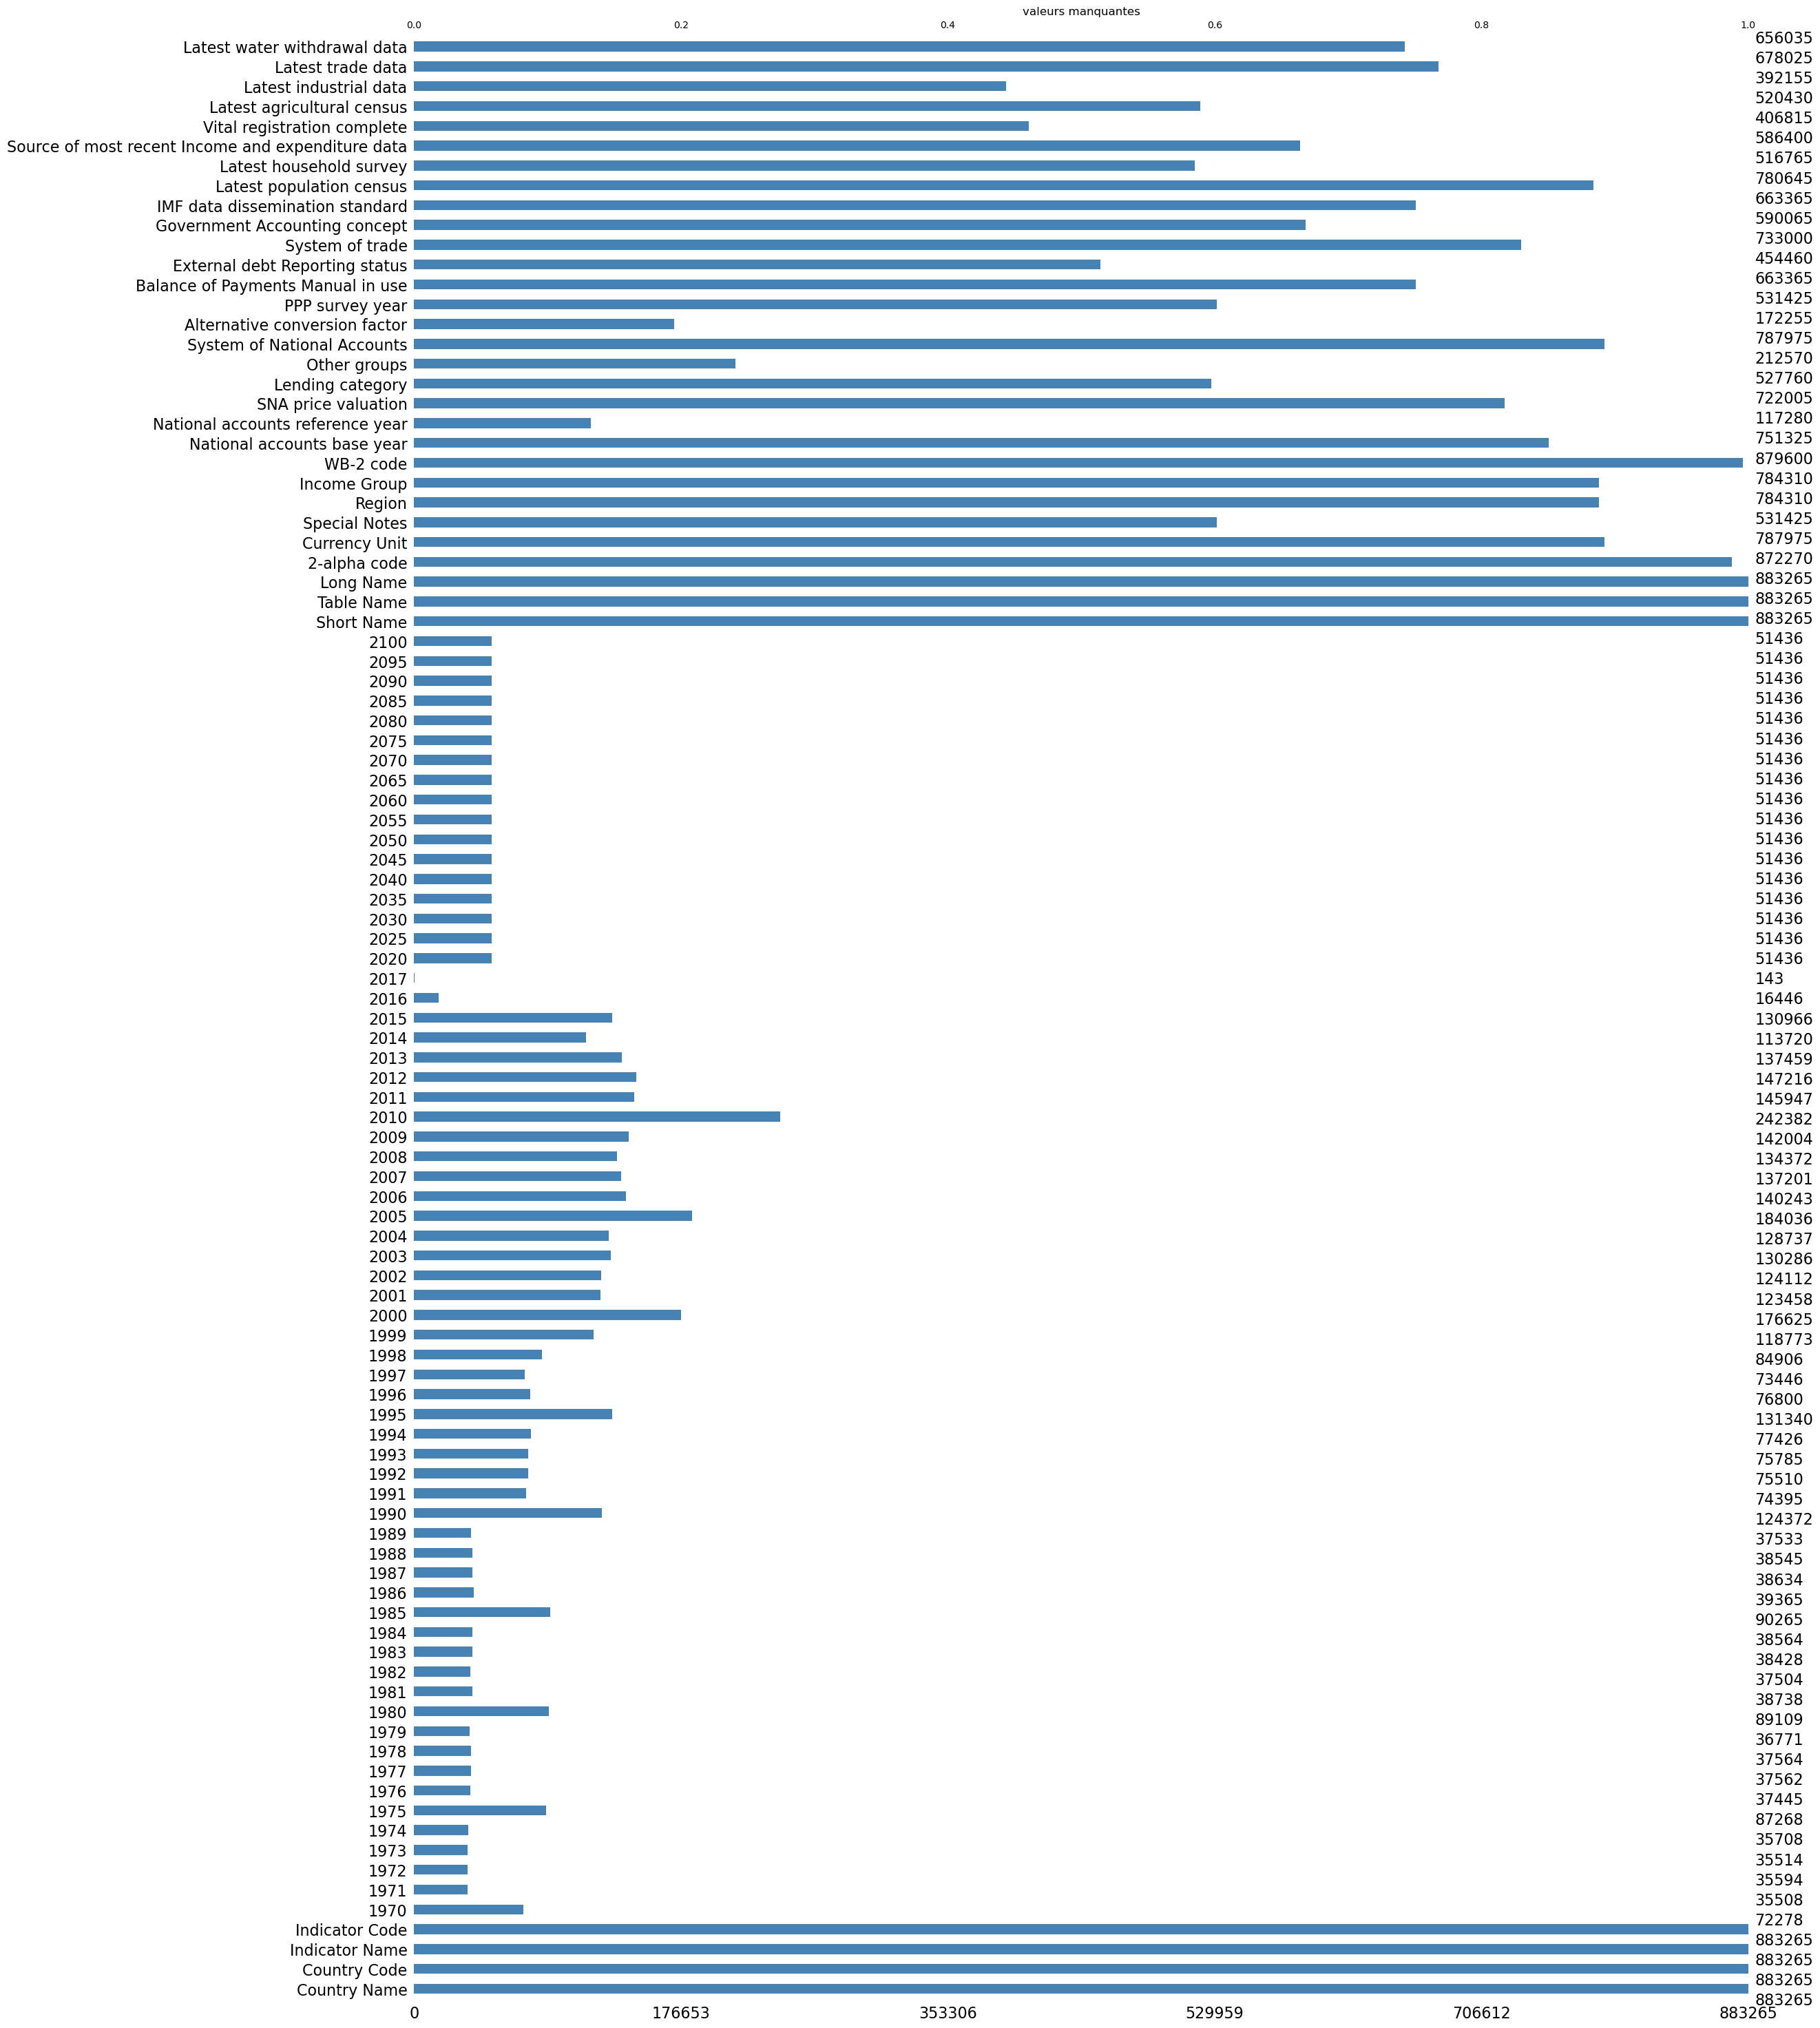

In [41]:
# la fonction msno.bar pour afficher les valeurs manquantes
msno.bar(data_country, color='steelblue')

plt.title("valeurs manquantes")

plt.show()


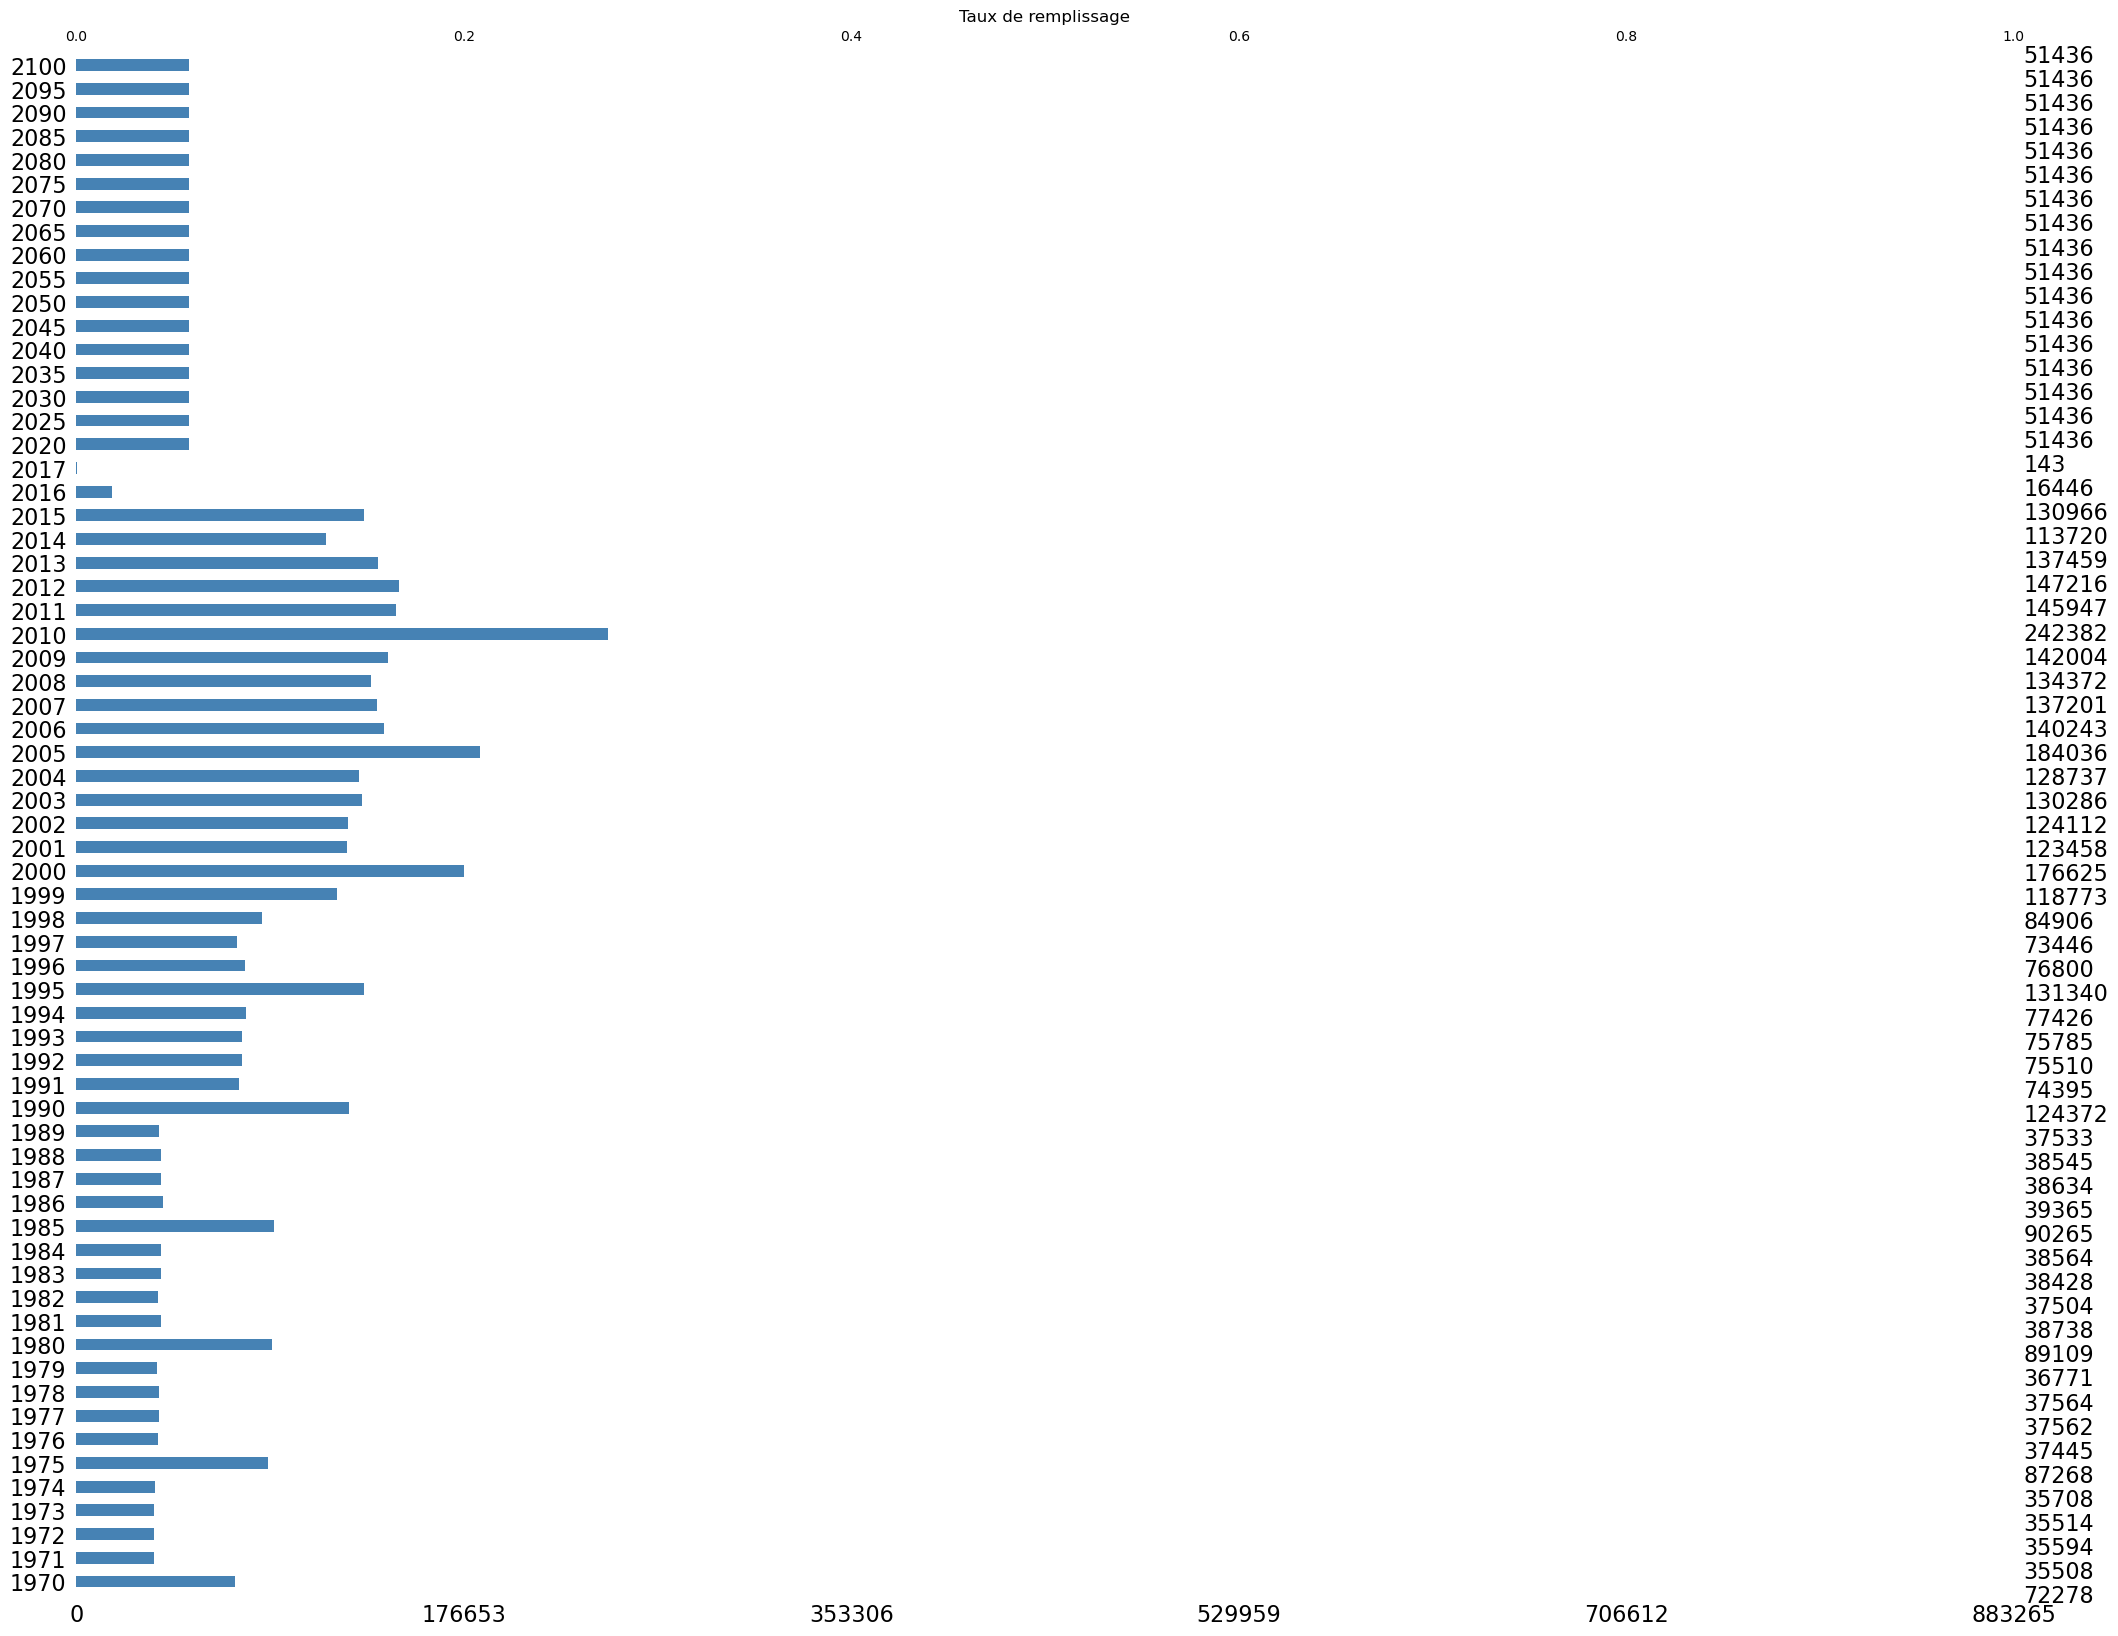

In [42]:
# Sélection les colonnes de 1970 à 2100 (indices de colonne 4 à 68 inclus)
columns_to_check = data_country.columns[4:69]

# la fonction msno.bar pour afficher les valeurs manquantes
msno.bar(data_country[columns_to_check], color='steelblue')


plt.title("Taux de remplissage")


plt.show()


Les années les mieux renseignées sont les années 2010 et 2005 , et les moins renseignées sont les années 2016 et 2017 

In [43]:
# Sélection des années  pertinentes pour l'historique (de 2005 à 2015) en utilisant les numéros de colonne
historique_data = data_country.iloc[:, [0, 1, 2, 3, 75] + list(range(39, 50))]
# Sélection des colonnes pertinentes pour les données de projection (à partir de 2015) en utilisant les numéros de colonne
projection_data = data_country.iloc[:, [0, 1, 2, 3, 75] + list(range(49, 69))]

In [44]:
historique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 886929
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    883265 non-null  object 
 1   Country Code    883265 non-null  object 
 2   Indicator Name  883265 non-null  object 
 3   Indicator Code  883265 non-null  object 
 4   Region          784310 non-null  object 
 5   2005            184036 non-null  float64
 6   2006            140243 non-null  float64
 7   2007            137201 non-null  float64
 8   2008            134372 non-null  float64
 9   2009            142004 non-null  float64
 10  2010            242382 non-null  float64
 11  2011            145947 non-null  float64
 12  2012            147216 non-null  float64
 13  2013            137459 non-null  float64
 14  2014            113720 non-null  float64
 15  2015            130966 non-null  float64
dtypes: float64(11), object(5)
memory usage: 114.6+ MB


In [45]:
# Sélection des colonnes qu'on souhaite fusionner
columns_to_melt = historique_data.columns[5:15]

# la fonction melt pour fusionner les colonnes en une colonne "Year"
df = pd.melt(historique_data, id_vars= historique_data.columns[:5], value_vars=columns_to_melt, var_name="Year", value_name="Value")

df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Region,Year,Value
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,2005,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,2005,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,2005,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,2005,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,2005,82.489487


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832650 entries, 0 to 8832649
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country Name    object 
 1   Country Code    object 
 2   Indicator Name  object 
 3   Indicator Code  object 
 4   Region          object 
 5   Year            object 
 6   Value           float64
dtypes: float64(1), object(6)
memory usage: 471.7+ MB


## Choix d'indicateurs 



Recherche par mots clés 

La cible de notre entreprise :

    la population des 15-24 ans,
    le nombre d'étudiants scolarisés au niveau lycée et universités.
    le niveau de vie des habitants comparable par pays
    les moyens de communication (accès à l'électricité, accès au réseau internet, possession d'un ordinateur personnel).

liste mots clés ['demography','15','20','24','gdp','economy','internet','school','education']

In [47]:
summary = df.groupby(['Indicator Code', 'Indicator Name'])['Value'].agg(count=pd.Series.count, nan_ratio=lambda x: x.isna().mean()).sort_values(by='nan_ratio')

# Seuil de 50% de valeurs manquantes
threshold = 0.5
indicateurs_utiles = summary[summary['nan_ratio'] <= threshold]
indicateurs_utiles

,,count,nan_ratio
Indicator Code,Indicator Name,,
SP.POP.TOTL,"Population, total",2390,0.008299
SP.POP.GROW,Population growth (annual %),2389,0.008714
NY.GDP.MKTP.CD,GDP at market prices (current US$),2267,0.059336
NY.GDP.PCAP.CD,GDP per capita (current US$),2267,0.059336
IT.NET.USER.P2,Internet users (per 100 people),2261,0.061826
...,...,...,...
UIS.R.1.G1,"Repeaters in Grade 1 of primary education, both sexes (number)",1212,0.497095
UIS.E.5.B,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",1208,0.498755
UIS.REPP.1.G1,"Percentage of repeaters in Grade 1 of primary education, both sexes (%)",1207,0.499170


In [48]:
#selection des lignes du DataFrame d'origine en fonction des Indicator Code de indicateurs_utiles
filtered_df = df[df['Indicator Code'].isin(indicateurs_utiles.index.get_level_values('Indicator Code'))]
filtered_df.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Year,Value
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,2005,82.489487
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,NaN,2005,79.475769
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,NaN,2005,0.930840
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,NaN,2005,85.380287
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,NaN,2005,76.131767


In [49]:
# filtre sur les lignes du DataFrame de notre liste d'indicateurss
def_indicateur = series[series['Indicator Name'].isin(indicateurs_utiles.index.get_level_values('Indicator Name'))]
def_indicateur.head() 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1660,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,NY.GDP.MKTP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (constant 2011 international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,2011,NaN,Gap-filled total,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1664,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Définir une liste de mots-clés suivant les critères choisis
liste_mots = ['demography','15','20','24','gdp','economy','internet','school','education']

In [51]:
# mettre la colonne 'Long definition' en minuscule pour chercher un seul mot-clé (par exemple 'internet' pour 'internet' et ' Internet')
def_indicateur['Long definition'] = def_indicateur['Long definition'].str.lower()
# chercher les mots-clés définis dans la colonne 'Long Definition'
liste_indicateurs_flitré = def_indicateur[def_indicateur['Long definition'].str.contains("|".join(liste_mots))]['Indicator Name'].unique()
# Afficher le nombre d'indicateurs trouvés
print('Nous avons', len(liste_indicateurs_flitré), 'indicateurs qui peuvent nous intéressent')

Nous avons 284 indicateurs qui peuvent nous intéressent


In [52]:
# Affiher la liste des indicateurs trouvés
print('La liste des indicateurs qui peuvent nous intéresser après  sélection par mots cles:')
for k in liste_indicateurs_flitré:
    print(k)

La liste des indicateurs qui peuvent nous intéresser après  sélection par mots cles:
Internet users (per 100 people)
GDP, PPP (current international $)
GDP, PPP (constant 2011 international $)
GDP per capita (current US$)
GDP per capita, PPP (current international $)
GDP per capita, PPP (constant 2011 international $)
GNI, PPP (current international $)
GNI per capita, Atlas method (current US$)
GNI per capita, PPP (current international $)
Duration of compulsory education (years)
Enrolment in pre-primary education, both sexes (number)
Enrolment in pre-primary education, female (number)
Percentage of students in pre-primary education who are female (%)
Pupil-teacher ratio in pre-primary education (headcount basis)
Gross enrolment ratio, pre-primary, both sexes (%)
Gross enrolment ratio, pre-primary, female (%)
Gross enrolment ratio, pre-primary, male (%)
Percentage of enrolment in pre-primary education in private institutions (%)
Teachers in pre-primary education, both sexes (number)
Te

In [53]:
indicator_retenus = ['Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)',
       'GDP per capita (current US$)', 'Internet users (per 100 people)',
       'Population, ages 15-24, total']

# un  DataFrame filtré contenant uniquement les lignes avec les codes d'indicateurs de la liste
filtered_df2 = filtered_df[filtered_df['Indicator Name'].isin(indicator_retenus)]


In [54]:
filtered_df2['Indicator Code'].unique()

array(['SE.TER.ENRL', 'UIS.E.3', 'NY.GDP.PCAP.CD', 'IT.NET.USER.P2',
       'SP.POP.1524.TO.UN'], dtype=object)

In [55]:
# Liste des noms d'indicateurs à rechercher
liste_nom_indi = ['Enrolment in tertiary education, all programmes, both sexes (number)',
                  'Enrolment in upper secondary education, both sexes (number)',
                  'GDP per capita (current US$)', 
                  'Internet users (per 100 people)',
                  'Population, ages 15-24, total']

# filtre surles lignes du DataFrame de notre liste d'indicateurss
def_indicateur2 = series[series['Indicator Name'].isin(liste_nom_indi)]
def_indicateur2 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2332,SE.TER.ENRL,Tertiary,"Enrolment in tertiary education, all programme...",NaN,The total number of students enrolled at publi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,SP.POP.1524.TO.UN,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...","Population, ages 15-24, total is the total pop...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825,UIS.E.3,Secondary,"Enrolment in upper secondary education, both s...",NaN,Total number of students enrolled in public an...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Regrouper les données par 'Indicator Code' et compter le nombre de pays 
indic_pays2 = filtered_df2.groupby('Country Name')['Indicator Code'].count().reset_index().sort_values(by='Indicator Code', ascending=True)
indic_pays2

,Country Name,Indicator Code
0,Afghanistan,50
152,Myanmar,50
153,Namibia,50
154,Nauru,50
155,Nepal,50
...,...,...
85,Guatemala,50
86,Guinea,50
87,Guinea-Bissau,50
119,Least developed countries: UN classification,50


In [57]:
pivot_df = pd.pivot_table(filtered_df2, index=['Country Name', 'Year','Region'], columns='Indicator Code', values='Value')

pivot_df.reset_index(inplace=True)
pivot_df.head()

Indicator Code,Country Name,Year,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3
0,Afghanistan,2005,South Asia,1.224148,250.294130,NaN,4910340.0,190104.0
1,Afghanistan,2006,South Asia,2.107124,272.563077,NaN,5134377.0,271144.0
2,Afghanistan,2007,South Asia,1.900000,369.835796,NaN,5367499.0,285290.0
3,Afghanistan,2008,South Asia,1.840000,373.361116,NaN,5606736.0,361193.0
4,Afghanistan,2009,South Asia,3.550000,445.893298,95185.0,5848604.0,443002.0


In [58]:
pivot_df.describe(include ='all')

Indicator Code,Country Name,Year,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3
count,2096,2096,2096,2006.000000,2020.000000,1.335000e+03,1.826000e+03,1.474000e+03
unique,213,10,7,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,2008,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN
freq,10,210,563,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,32.888007,15449.026873,1.199601e+06,6.565430e+06,1.342343e+06
std,NaN,NaN,NaN,27.951159,23526.574926,3.720731e+06,2.410044e+07,5.156330e+06
min,NaN,NaN,NaN,0.000000,150.507043,2.000000e+00,2.732000e+03,3.530000e+02
25%,NaN,NaN,NaN,7.000000,1446.237039,5.631950e+04,4.799048e+05,4.904100e+04
50%,NaN,NaN,NaN,26.187503,5185.112036,2.020760e+05,1.276142e+06,2.040745e+05
75%,NaN,NaN,NaN,55.242498,19264.877281,6.602820e+05,4.833043e+06,7.879732e+05


In [59]:
# ronommer les codes indicateurs
pivot_df=pivot_df.rename(columns={'IT.NET.USER.P2':'Accès internet %','NY.GDP.PCAP.CD': 'PIB/hbts','SP.POP.1524.TO.UN': '15-24ans', 'UIS.E.3':'Scolarisation lycée', 'SE.TER.ENRL':'Inscription enseignement supérieur'})
pivot_df.head()

Indicator Code,Country Name,Year,Region,Accès internet %,PIB/hbts,Inscription enseignement supérieur,15-24ans,Scolarisation lycée
0,Afghanistan,2005,South Asia,1.224148,250.294130,NaN,4910340.0,190104.0
1,Afghanistan,2006,South Asia,2.107124,272.563077,NaN,5134377.0,271144.0
2,Afghanistan,2007,South Asia,1.900000,369.835796,NaN,5367499.0,285290.0
3,Afghanistan,2008,South Asia,1.840000,373.361116,NaN,5606736.0,361193.0
4,Afghanistan,2009,South Asia,3.550000,445.893298,95185.0,5848604.0,443002.0


In [60]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country Name                        2096 non-null   object 
 1   Year                                2096 non-null   object 
 2   Region                              2096 non-null   object 
 3   Accès internet %                    2006 non-null   float64
 4   PIB/hbts                            2020 non-null   float64
 5   Inscription enseignement supérieur  1335 non-null   float64
 6   15-24ans                            1826 non-null   float64
 7   Scolarisation lycée                 1474 non-null   float64
dtypes: float64(5), object(3)
memory usage: 131.1+ KB


In [61]:
pivot_df.isnull().sum()

Indicator Code
Country Name                            0
Year                                    0
Region                                  0
Accès internet %                       90
PIB/hbts                               76
Inscription enseignement supérieur    761
15-24ans                              270
Scolarisation lycée                   622
dtype: int64

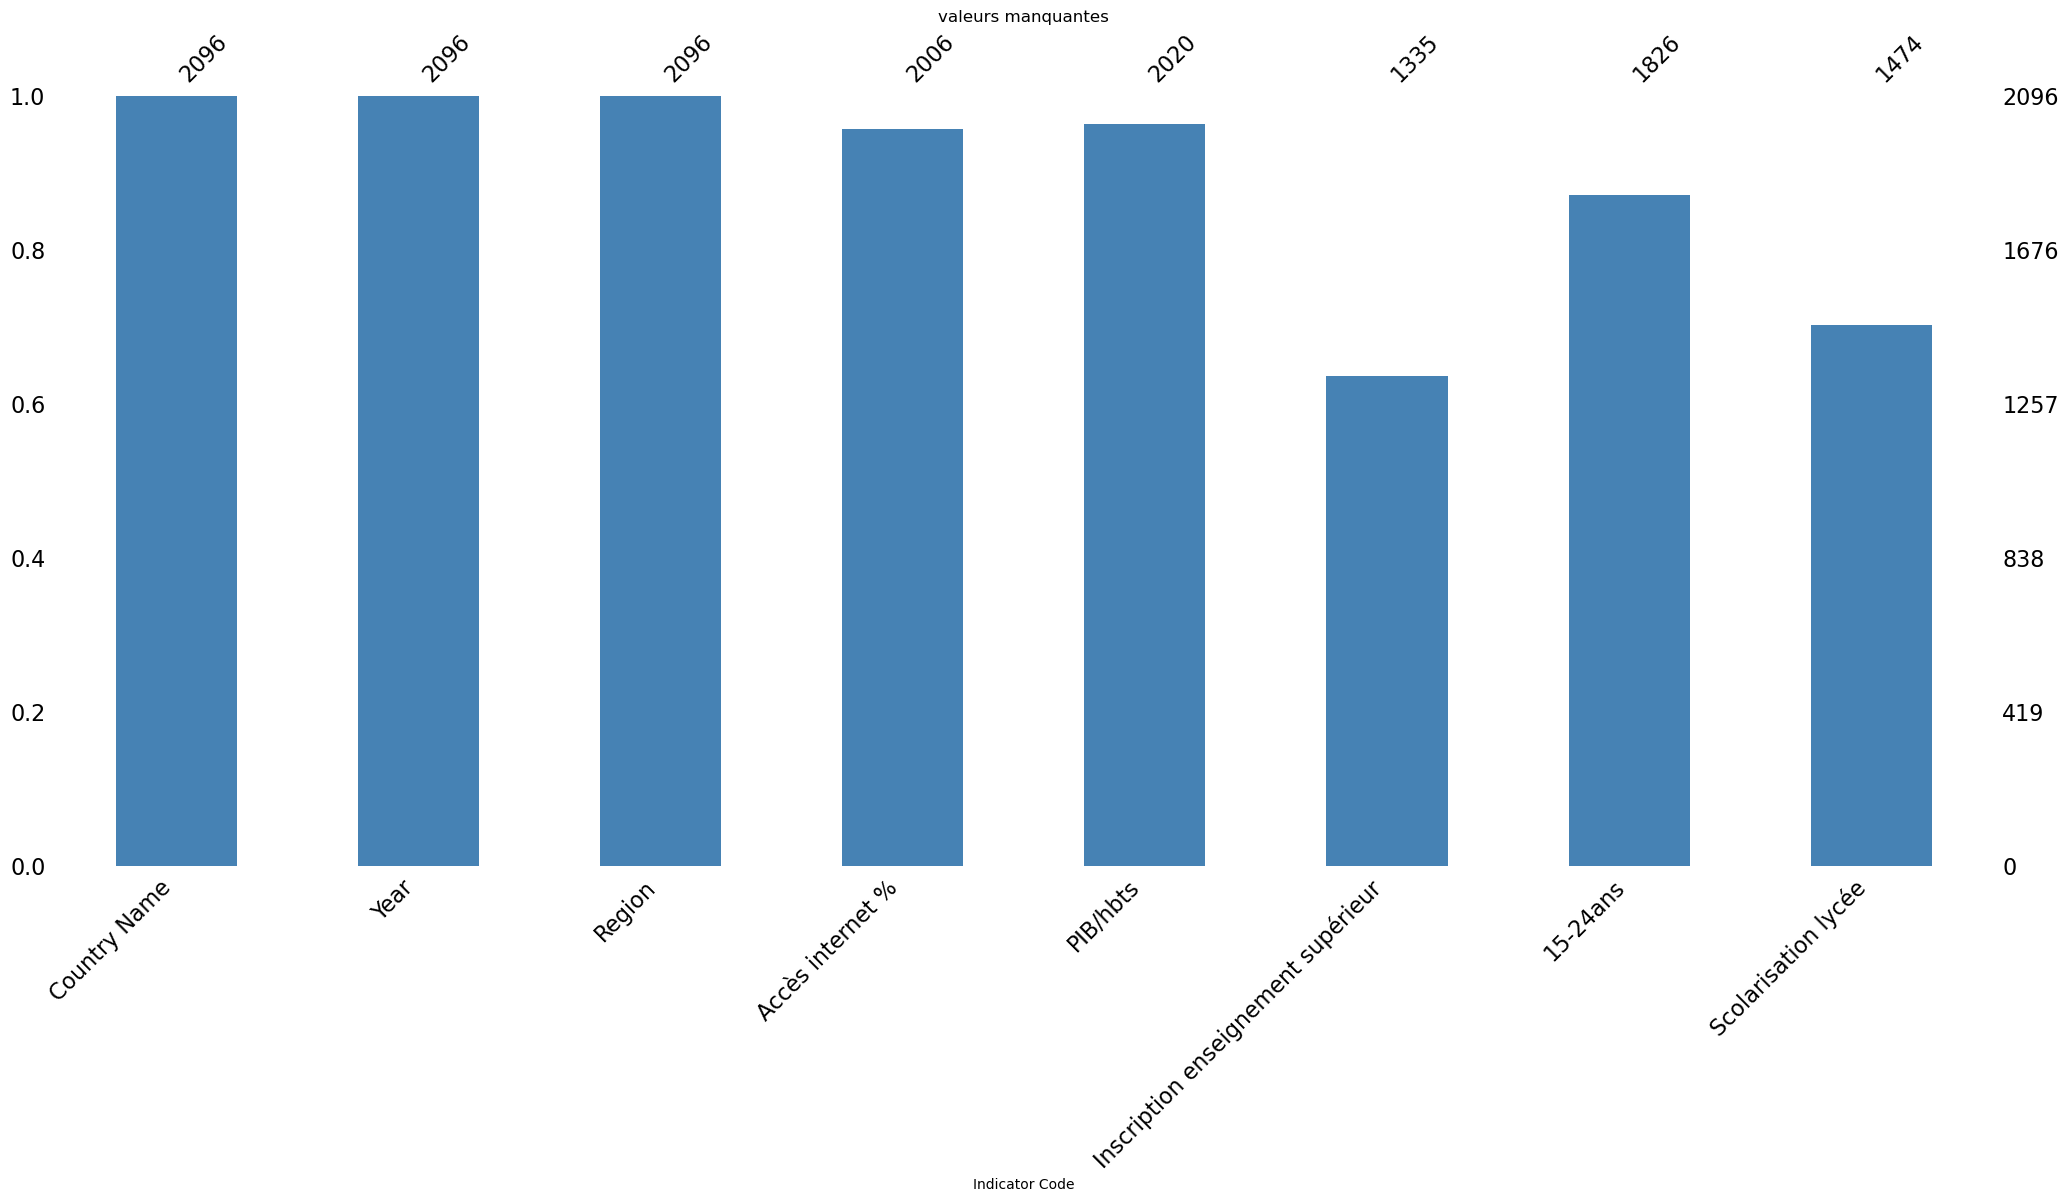

In [62]:
# la fonction msno.bar pour afficher les valeurs manquantes
msno.bar(pivot_df, color='steelblue')

plt.title("valeurs manquantes")

plt.show()


In [63]:
# Liste d'indicateurs 
indicateurs = ['Accès internet %', 'PIB/hbts', 'Inscription enseignement supérieur', '15-24ans', 'Scolarisation lycée']

# Grouper par pays et calcule la moyenne pour chaque indicateur
pivot_df_grouped = pivot_df.groupby('Country Name')[indicateurs].transform('median')

# Imputation  des valeurs manquantes dans 'pivot_df' avec les medianes de chaque pays par indicateurs
pivot_df[indicateurs] = pivot_df[indicateurs].fillna(pivot_df_grouped)


In [64]:
pivot_df.isnull().sum()

Indicator Code
Country Name                            0
Year                                    0
Region                                  0
Accès internet %                       66
PIB/hbts                               37
Inscription enseignement supérieur    309
15-24ans                              186
Scolarisation lycée                   169
dtype: int64

In [65]:
#on supprime les pays qui n'ont acune valeurs sur l'un des indicateurs retenus

pivot_df.dropna(inplace=True)

In [66]:
pivot_df.isnull().sum()

Indicator Code
Country Name                          0
Year                                  0
Region                                0
Accès internet %                      0
PIB/hbts                              0
Inscription enseignement supérieur    0
15-24ans                              0
Scolarisation lycée                   0
dtype: int64

In [67]:
pivot_df.shape

(1660, 8)

In [68]:
print('nous avons',pivot_df['Country Name'].nunique(), 'pays candidats')

nous avons 166 pays candidats


## Distribution variables

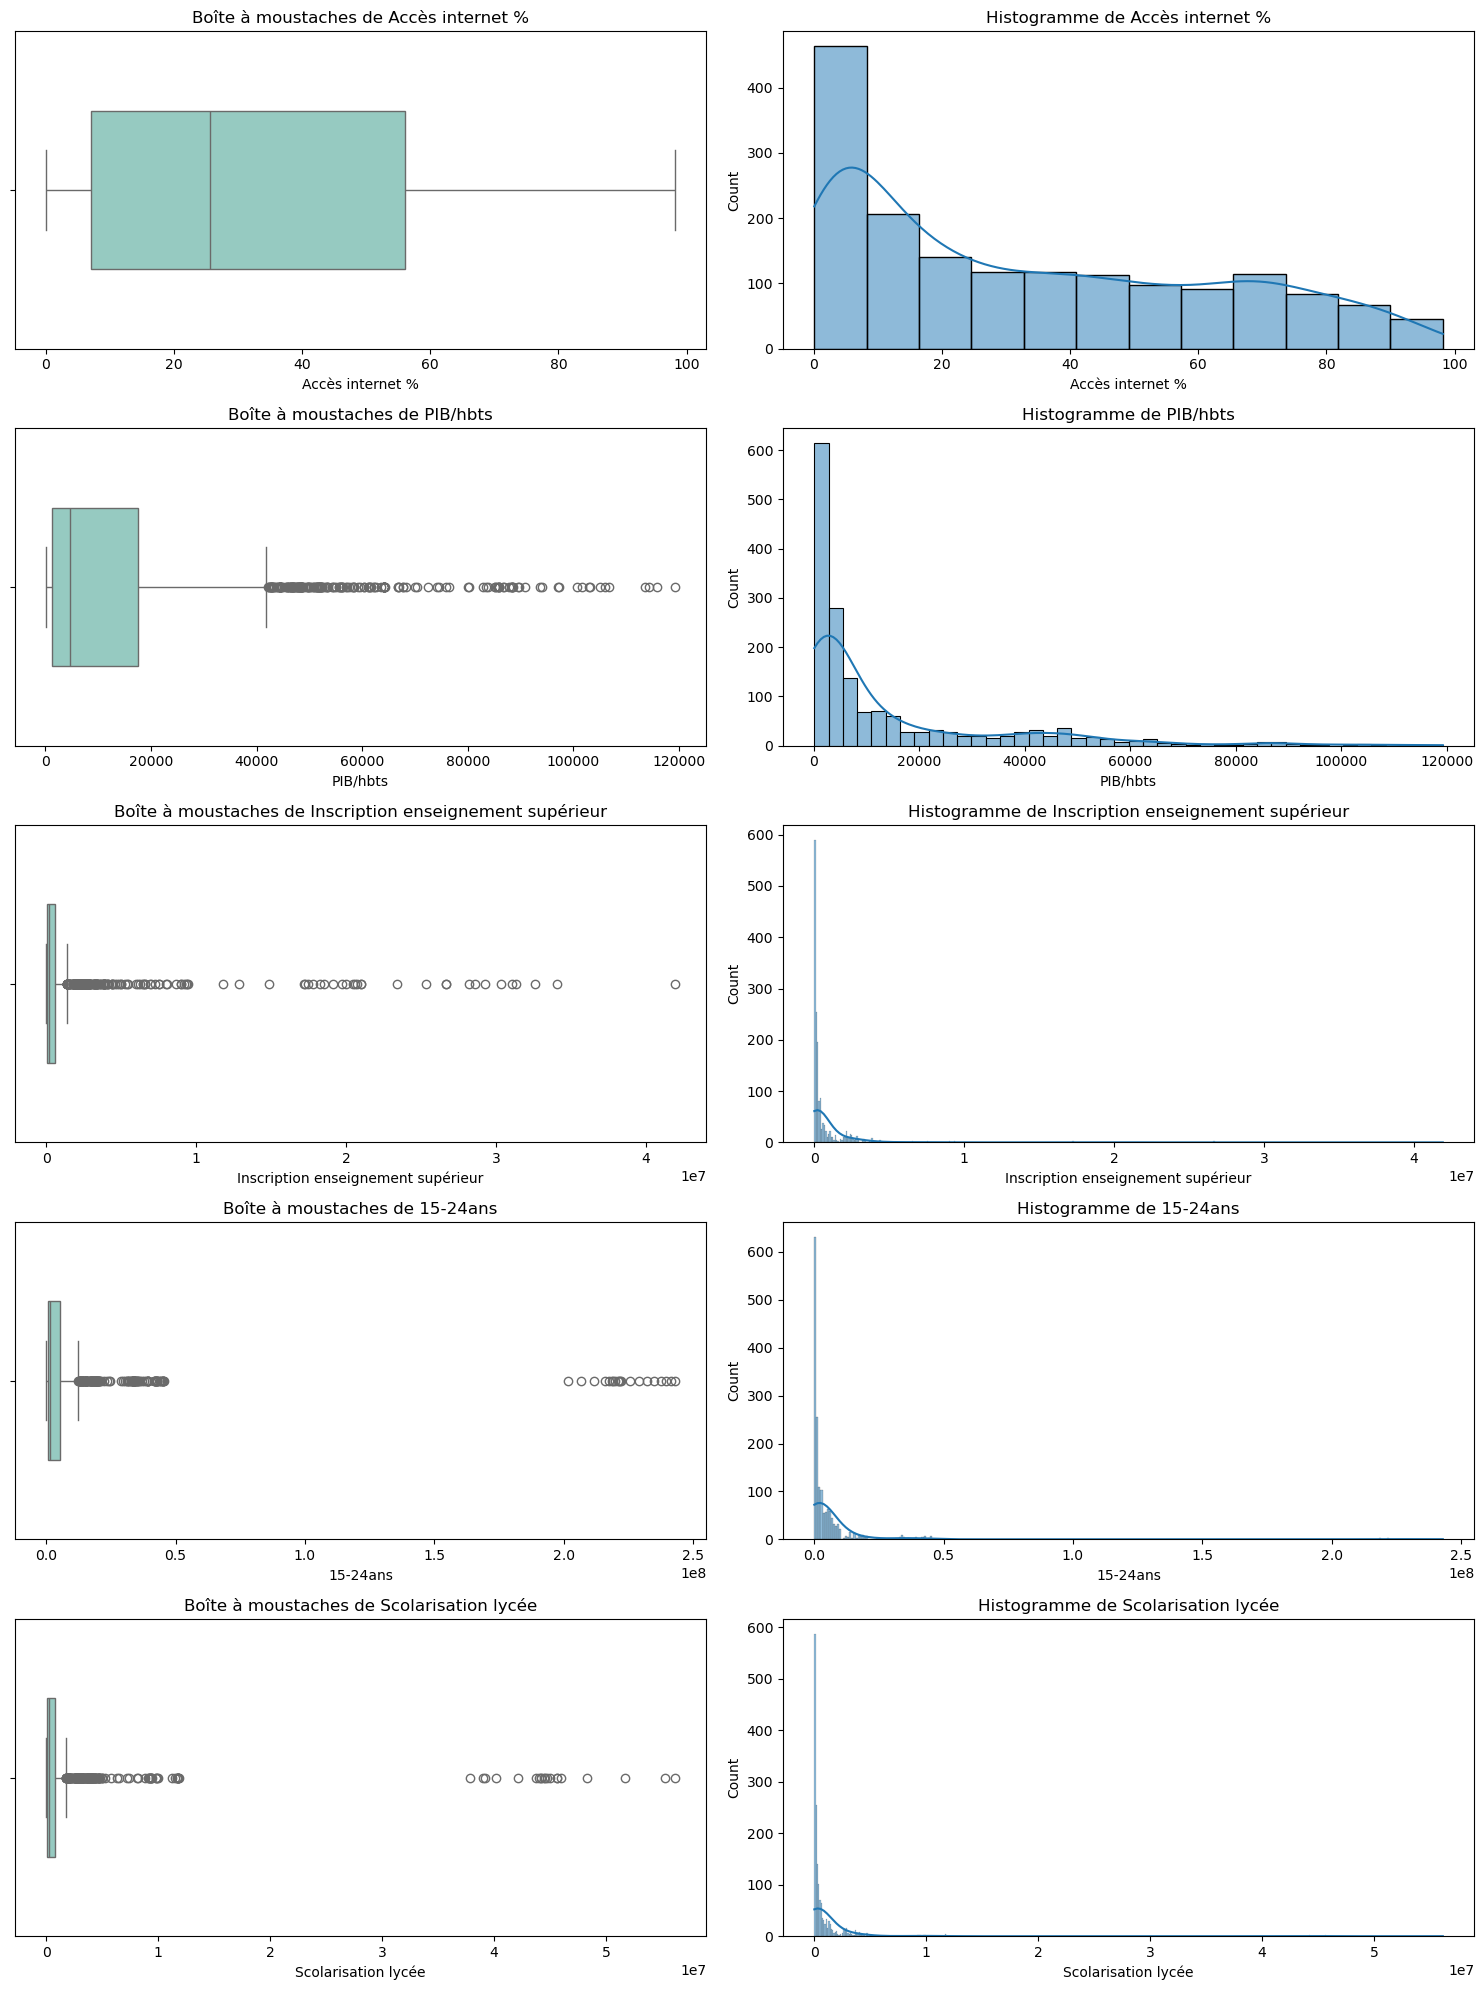

In [69]:
#histogramme et boîte à moustache de chaque indicateur
plt.figure(figsize=(15, 20))
color_palette = 'Set3'
for i, indicateur in enumerate(indicateurs):
    plt.subplot(5, 2, 2 * i + 1)
    sns.boxplot(pivot_df[indicateur], width=0.5, orient='h',palette=color_palette)
    plt.title(f'Boîte à moustaches de {indicateur}', fontsize=12)

    plt.subplot(5, 2, 2 * i + 2)
    sns.histplot(pivot_df[indicateur], kde=True,palette=color_palette)
    plt.title(f'Histogramme de {indicateur}', fontsize=12)

plt.tight_layout()
plt.show()


Distribution étalée à droite pour les tous indicateurs . Présence de plusieyrs d'outliers pour les indicateurs

## Détection outtliers

In [70]:


pays_outliers_par_indicateur = {}  # Dictionnaire pour stocker les pays avec des outliers pour chaque indicateur

for indicateur in indicateurs:
    q1 = pivot_df[indicateur].quantile(0.25)
    q3 = pivot_df[indicateur].quantile(0.75)
    iqr = q3 - q1

    # Calcul des limites inférieure et supérieure pour les outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Sélection des outliers pour l'indicateur actuel
    indicator_outliers = pivot_df[(pivot_df[indicateur] < lower_bound) | (pivot_df[indicateur] > upper_bound)]
    
    # Obtenir les pays avec des outliers pour l'indicateur actuel
    pays_outliers = indicator_outliers['Country Name'].unique()
    pays_outliers_par_indicateur[indicateur] = pays_outliers

# Affichage des pays contenant des outliers pour chaque indicateur
for indicateur, pays_outliers in pays_outliers_par_indicateur.items():
    print(f"Pays avec outliers pour l'indicateur {indicateur}:")
    print(pays_outliers)


Pays avec outliers pour l'indicateur Accès internet %:
[]
Pays avec outliers pour l'indicateur PIB/hbts:
['Andorra' 'Australia' 'Austria' 'Belgium' 'Bermuda' 'Brunei Darussalam'
 'Cayman Islands' 'Denmark' 'Finland' 'France' 'Germany' 'Iceland'
 'Ireland' 'Japan' 'Kuwait' 'Luxembourg' 'Macao SAR, China' 'Netherlands'
 'New Zealand' 'Norway' 'Qatar' 'Singapore' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']
Pays avec outliers pour l'indicateur Inscription enseignement supérieur:
['Argentina' 'Australia' 'Bangladesh' 'Brazil' 'China' 'Colombia'
 'Egypt, Arab Rep.' 'France' 'Germany' 'India' 'Indonesia'
 'Iran, Islamic Rep.' 'Italy' 'Japan' 'Korea, Rep.' 'Mexico' 'Nigeria'
 'Pakistan' 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia'
 'Spain' 'Thailand' 'Turkey' 'Ukraine' 'United Kingdom' 'United States'
 'Venezuela, RB']
Pays avec outliers pour l'indicateur 15-24ans:
['Bangladesh' 'Brazil' 'China' 'Congo, Dem. Rep.' 'Egypt, Arab Rep.'
 'Ethiopia

# Normalisation et calcul du score et analyse 

## Normalisation 

In [71]:
pivot_df_scaled = pivot_df.copy()

# Instancier le MinMaxScaler
scaler = MinMaxScaler()

# Sélection des colonnes à scaler (toutes sauf "Year" et "Country Name")
columns_to_scale = pivot_df.columns.difference(['Year', 'Country Name', 'Region'])

# Appliquer la transformation Min-Max Scaling aux colonnes sélectionnées dans le nouveau DataFrame
pivot_df_scaled[columns_to_scale] = scaler.fit_transform(pivot_df[columns_to_scale])

# Afficher les premières lignes du nouveau DataFrame échelonné
pivot_df_scaled.head()

Indicator Code,Country Name,Year,Region,Accès internet %,PIB/hbts,Inscription enseignement supérieur,15-24ans,Scolarisation lycée
0,Afghanistan,2005,South Asia,0.011814,0.000838,0.002323,0.020184,0.003369
1,Afghanistan,2006,South Asia,0.020815,0.001025,0.002323,0.021106,0.004813
2,Afghanistan,2007,South Asia,0.018704,0.001842,0.002323,0.022065,0.005065
3,Afghanistan,2008,South Asia,0.018092,0.001872,0.002323,0.023049,0.006417
4,Afghanistan,2009,South Asia,0.035524,0.002481,0.002268,0.024045,0.007874


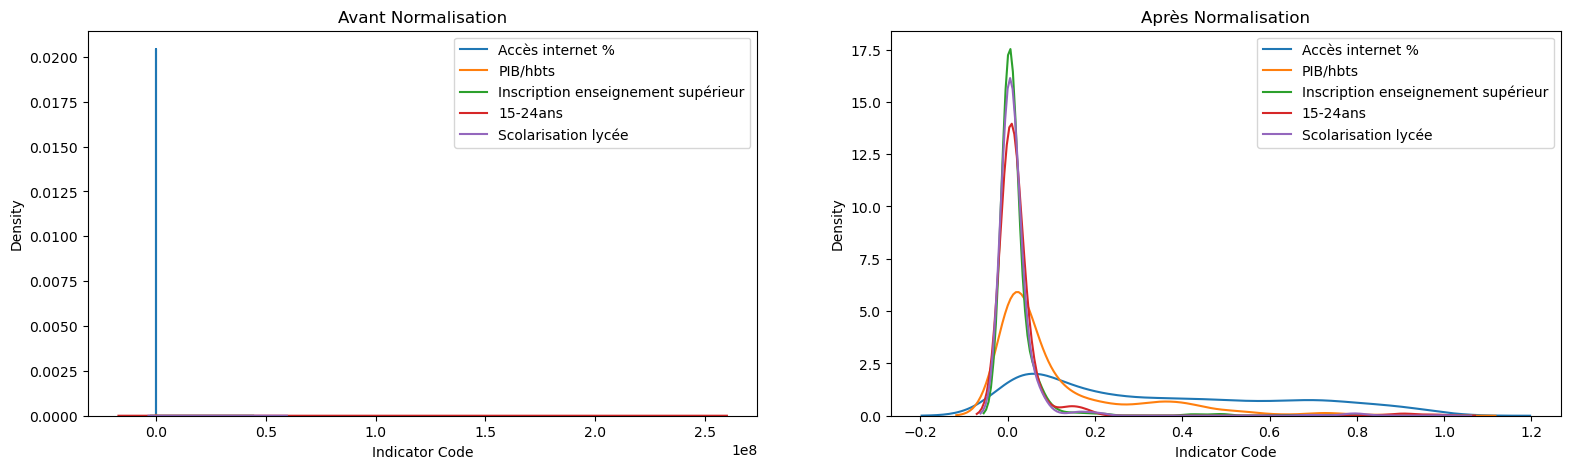

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(19, 5))
ax1.set_title('Avant Normalisation')
sns.kdeplot(pivot_df['Accès internet %'], ax=ax1)
sns.kdeplot(pivot_df['PIB/hbts'], ax=ax1)
sns.kdeplot(pivot_df['Inscription enseignement supérieur'], ax=ax1)
sns.kdeplot(pivot_df['15-24ans'], ax=ax1)
sns.kdeplot(pivot_df['Scolarisation lycée'], ax=ax1)
ax1.set_xlabel('Indicator Code')
ax1.legend(loc='upper right', labels=indicateurs)

ax2.set_title('Après Normalisation')
sns.kdeplot(pivot_df_scaled['Accès internet %'], ax=ax2)
sns.kdeplot(pivot_df_scaled['PIB/hbts'], ax=ax2)
sns.kdeplot(pivot_df_scaled['Inscription enseignement supérieur'], ax=ax2)
sns.kdeplot(pivot_df_scaled['15-24ans'], ax=ax2)
sns.kdeplot(pivot_df_scaled['Scolarisation lycée'], ax=ax2)
ax2.set_xlabel('Indicator Code')
ax2.legend(loc='upper right', labels=indicateurs)



In [73]:
# Liste des colonnes d'indicateurs normalisées
#indicateurs = ['Accès internet %', 'PIB/hbts', 'Inscription enseignement supérieur', '15-24ans', 'Scolarisation lycée']

# Créer un nouveau DataFrame pour stocker les moyennes par pays
moyennes_par_pays = pivot_df_scaled.groupby(['Country Name','Region'])[indicateurs].mean().reset_index()

moyennes_par_pays

Indicator Code,Country Name,Region,Accès internet %,PIB/hbts,Inscription enseignement supérieur,15-24ans,Scolarisation lycée
0,Afghanistan,South Asia,0.038048,0.002752,0.002712,0.024542,0.010102
1,Albania,Europe & Central Asia,0.368066,0.031970,0.002797,0.002428,0.002750
2,Algeria,Middle East & North Africa,0.143768,0.037092,0.025883,0.029512,0.021287
3,Andorra,Europe & Central Asia,0.758108,0.357233,0.000009,0.000012,0.000003
4,Angola,Sub-Saharan Africa,0.040156,0.028584,0.002461,0.015241,0.004375
...,...,...,...,...,...,...,...
161,Uzbekistan,Europe & Central Asia,0.161018,0.009626,0.006623,0.025075,0.026734
162,"Venezuela, RB",Latin America & Caribbean,0.351778,0.089622,0.050474,0.022071,0.013790
163,West Bank and Gaza,Middle East & North Africa,0.340157,0.017241,0.004473,0.003542,0.002460
164,"Yemen, Rep.",Middle East & North Africa,0.112907,0.009079,0.005858,0.021603,0.011032


## Calcul du score

In [74]:
# Calcule du score
nombre_indicateurs = len(indicateurs)
moyennes_par_pays['Score'] = moyennes_par_pays[indicateurs].sum(axis=1) / nombre_indicateurs
moyennes_par_pays = moyennes_par_pays.sort_values(by='Score', ascending=False)

In [75]:
df_top10 = moyennes_par_pays.head(10)
df_top10

Indicator Code,Country Name,Region,Accès internet %,PIB/hbts,Inscription enseignement supérieur,15-24ans,Scolarisation lycée,Score
36,China,East Asia & Pacific,0.300214,0.036654,0.706637,0.887595,0.778250,0.541870
73,India,South Asia,0.085877,0.008712,0.500057,0.956705,0.827906,0.475852
159,United States,North America,0.730688,0.411258,0.457921,0.183410,0.207972,0.398250
94,Luxembourg,Europe & Central Asia,0.867899,0.883781,0.000099,0.000221,0.000355,0.350471
117,Norway,Europe & Central Asia,0.923955,0.749142,0.005455,0.002510,0.004227,0.337058
19,Bermuda,North America,0.846671,0.724392,0.000027,0.000005,0.000024,0.314224
145,Switzerland,Europe & Central Asia,0.826630,0.617490,0.005773,0.003848,0.005549,0.291858
47,Denmark,Europe & Central Asia,0.904266,0.489051,0.006022,0.002682,0.004629,0.281330
144,Sweden,Europe & Central Asia,0.915646,0.446259,0.010327,0.004861,0.007197,0.276858
72,Iceland,Europe & Central Asia,0.947639,0.426225,0.000409,0.000159,0.000362,0.274959


## Analyse

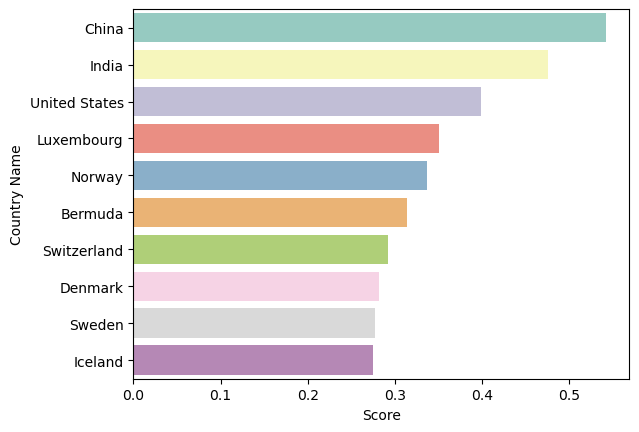

In [76]:
color_palette = 'Set3'
sns.barplot(x="Score", y="Country Name", ci=None, data=df_top10,palette=color_palette)
plt.show()

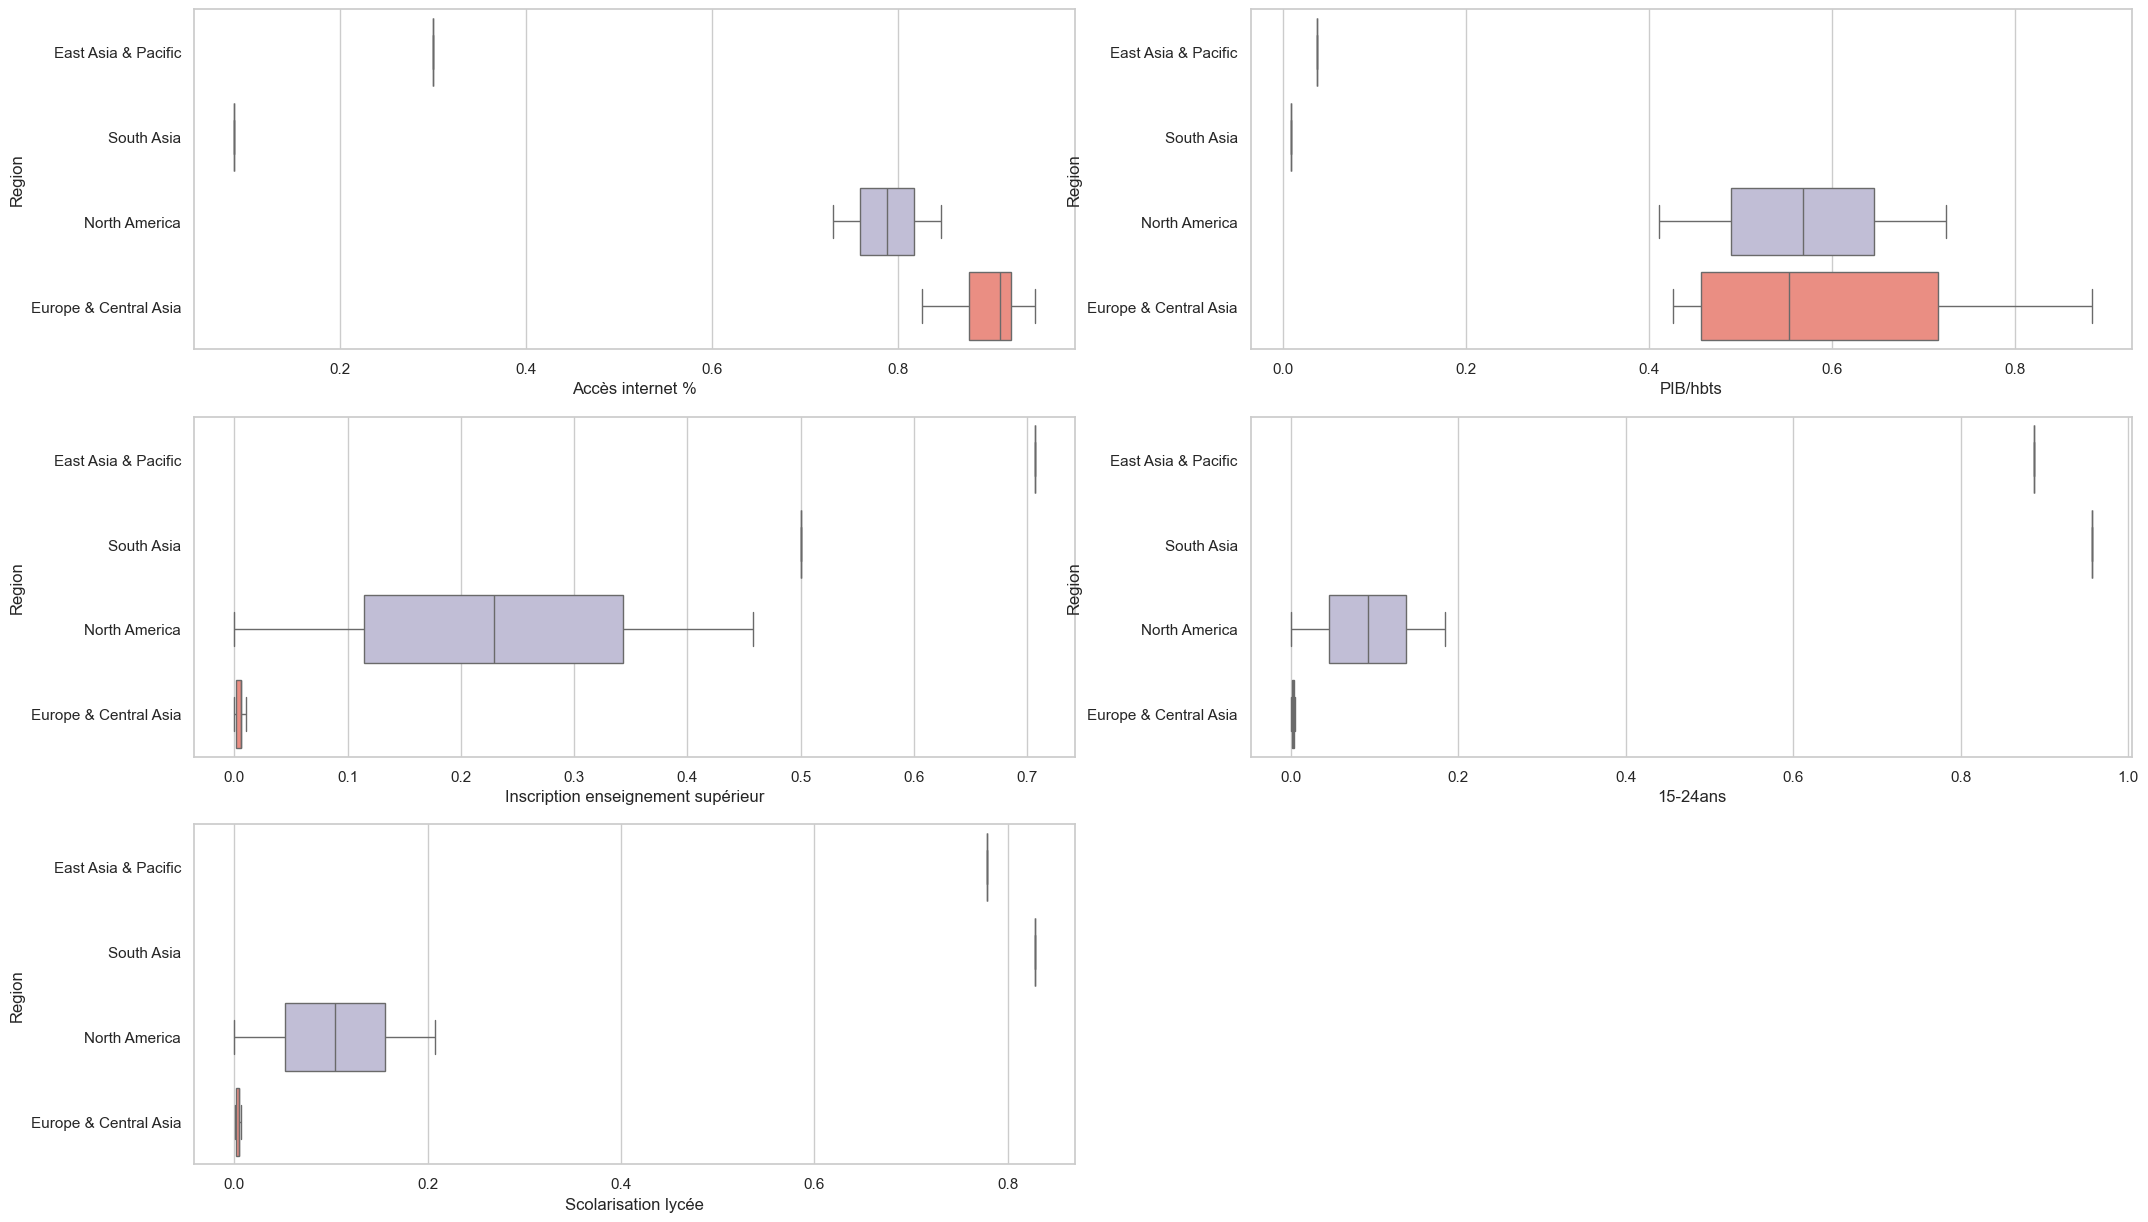

In [77]:
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")

# Deux graphiques sur la première ligne
plt.subplot(3, 2, 1)
sns.boxplot(data=df_top10, x='Accès internet %', y='Region',palette=color_palette)

plt.subplot(3, 2, 2)
sns.boxplot(data=df_top10, x='PIB/hbts', y='Region',palette=color_palette)

# Deux graphiques sur la deuxième ligne
plt.subplot(3, 2, 3)
sns.boxplot(data=df_top10, x='Inscription enseignement supérieur', y='Region',palette=color_palette)

plt.subplot(3, 2, 4)
sns.boxplot(data=df_top10, x='15-24ans', y='Region',palette=color_palette)

# Un graphique sur la troisième ligne
plt.subplot(3, 2, 5)
sns.boxplot(data=df_top10, x='Scolarisation lycée', y='Region',palette=color_palette)

plt.savefig("boxplots.png")
plt.show()



europe&central Asia et North America  ont le plus haut taux d'accès à Internet et un fort  PIB/hbts 


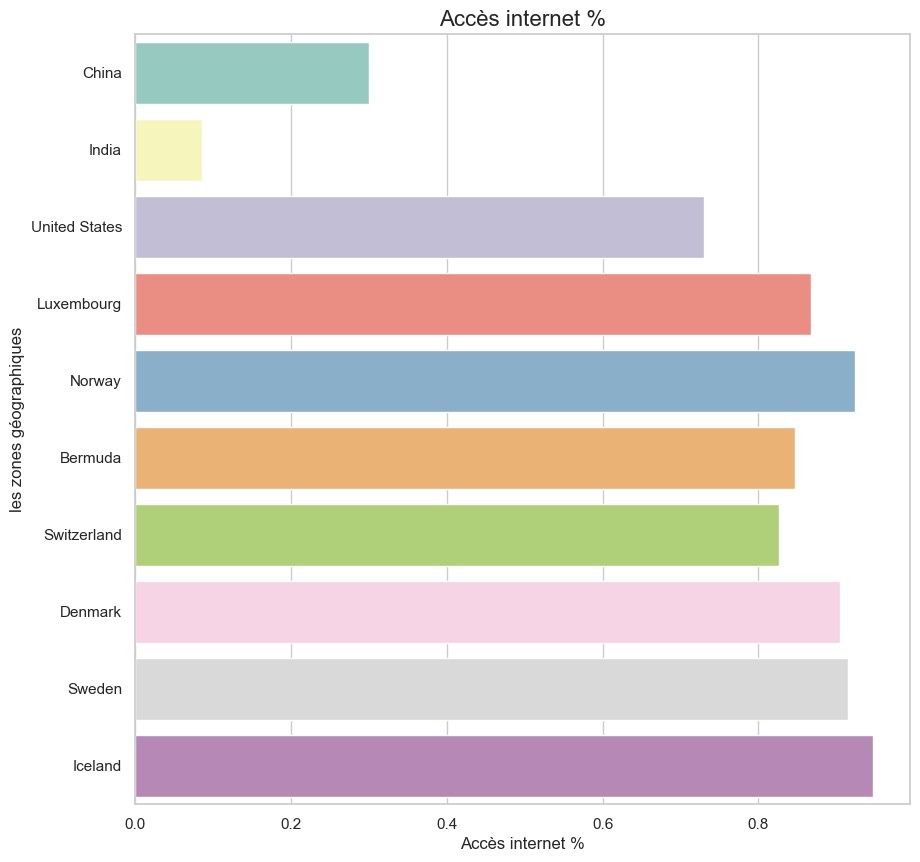

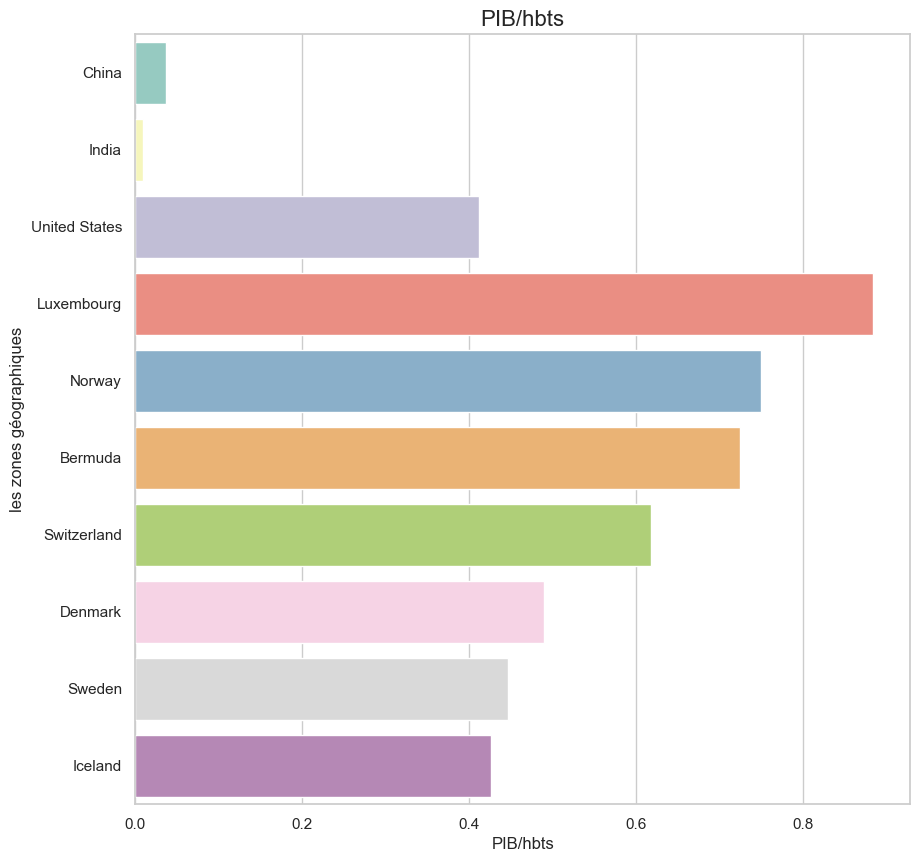

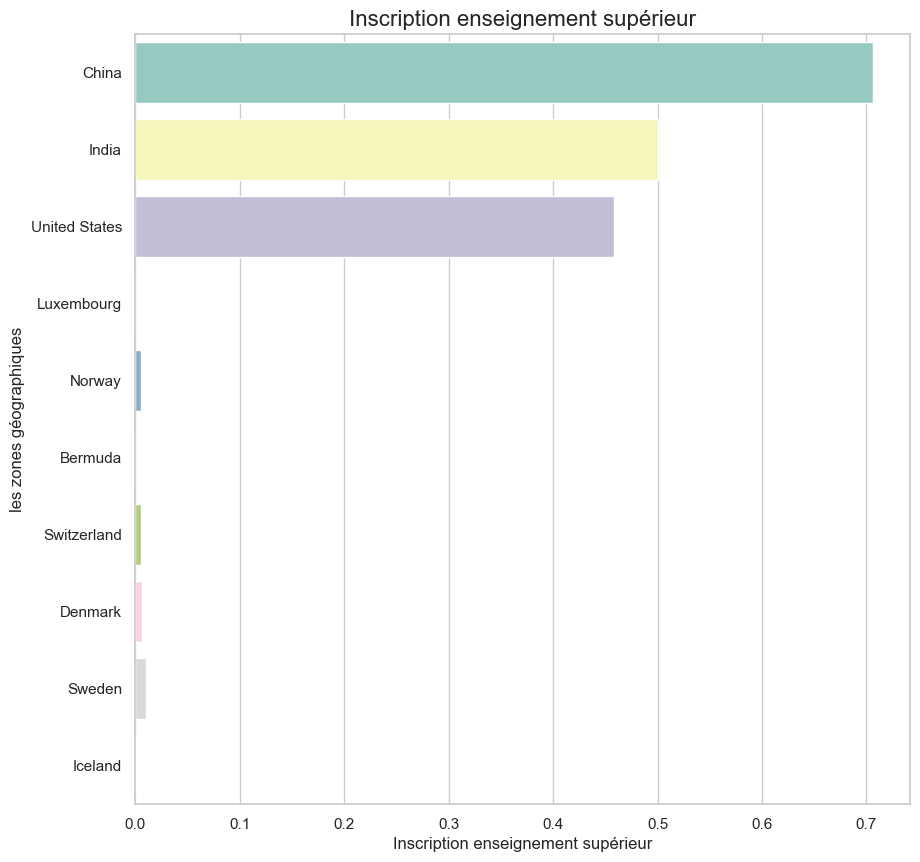

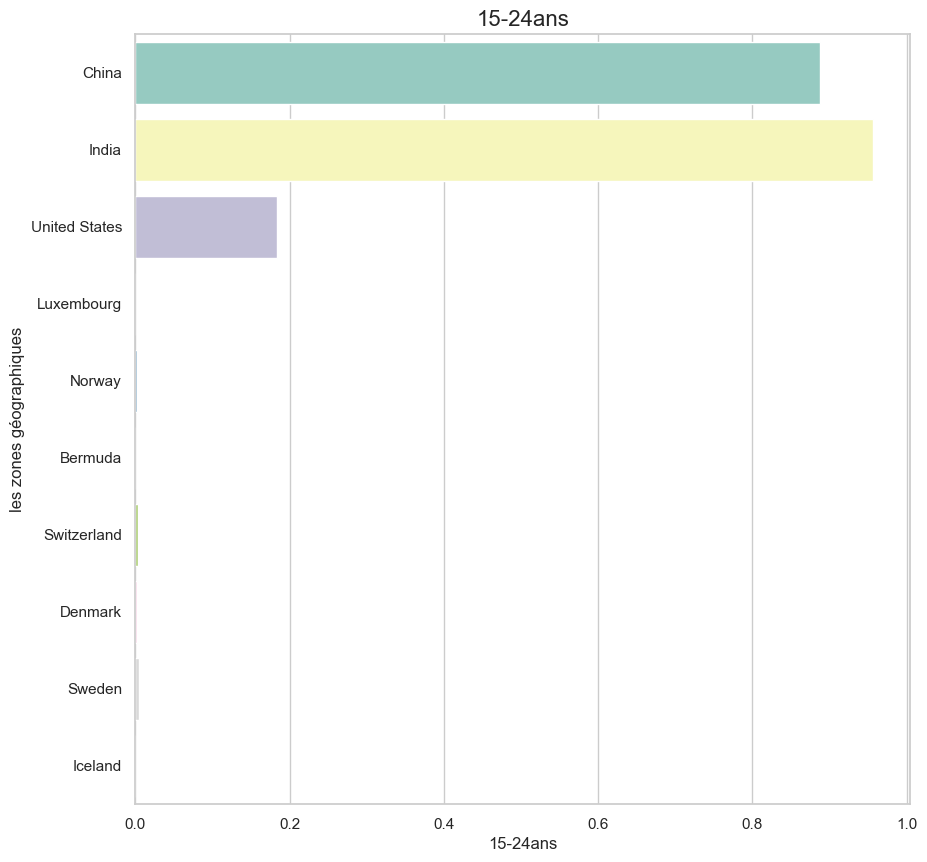

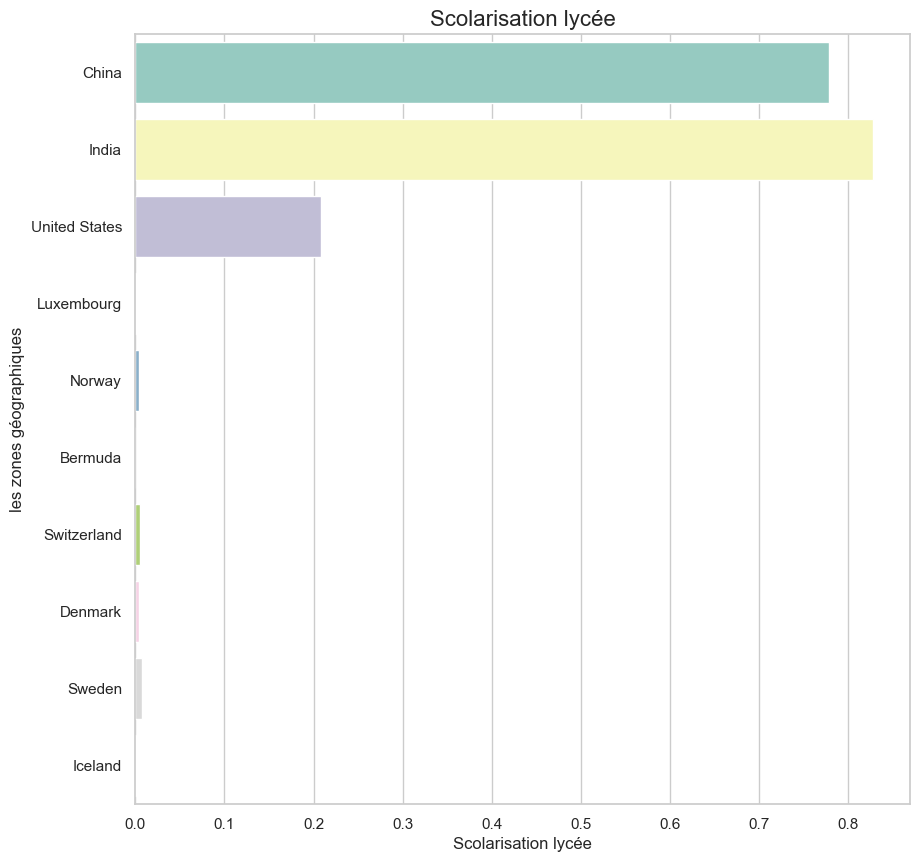

In [78]:
for col in indicateurs:
    plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 14})
    sns.barplot(data=df_top10, x=col, y='Country Name', estimator= np.mean, ci=None,palette=color_palette)
    plt.ylabel('les zones géographiques')
    plt.title(col , fontsize=16)

In [79]:
df_top10.reset_index(drop=True, inplace=True)
df_top10

Indicator Code,Country Name,Region,Accès internet %,PIB/hbts,Inscription enseignement supérieur,15-24ans,Scolarisation lycée,Score
0,China,East Asia & Pacific,0.300214,0.036654,0.706637,0.887595,0.778250,0.541870
1,India,South Asia,0.085877,0.008712,0.500057,0.956705,0.827906,0.475852
2,United States,North America,0.730688,0.411258,0.457921,0.183410,0.207972,0.398250
3,Luxembourg,Europe & Central Asia,0.867899,0.883781,0.000099,0.000221,0.000355,0.350471
4,Norway,Europe & Central Asia,0.923955,0.749142,0.005455,0.002510,0.004227,0.337058
5,Bermuda,North America,0.846671,0.724392,0.000027,0.000005,0.000024,0.314224
6,Switzerland,Europe & Central Asia,0.826630,0.617490,0.005773,0.003848,0.005549,0.291858
7,Denmark,Europe & Central Asia,0.904266,0.489051,0.006022,0.002682,0.004629,0.281330
8,Sweden,Europe & Central Asia,0.915646,0.446259,0.010327,0.004861,0.007197,0.276858
9,Iceland,Europe & Central Asia,0.947639,0.426225,0.000409,0.000159,0.000362,0.274959


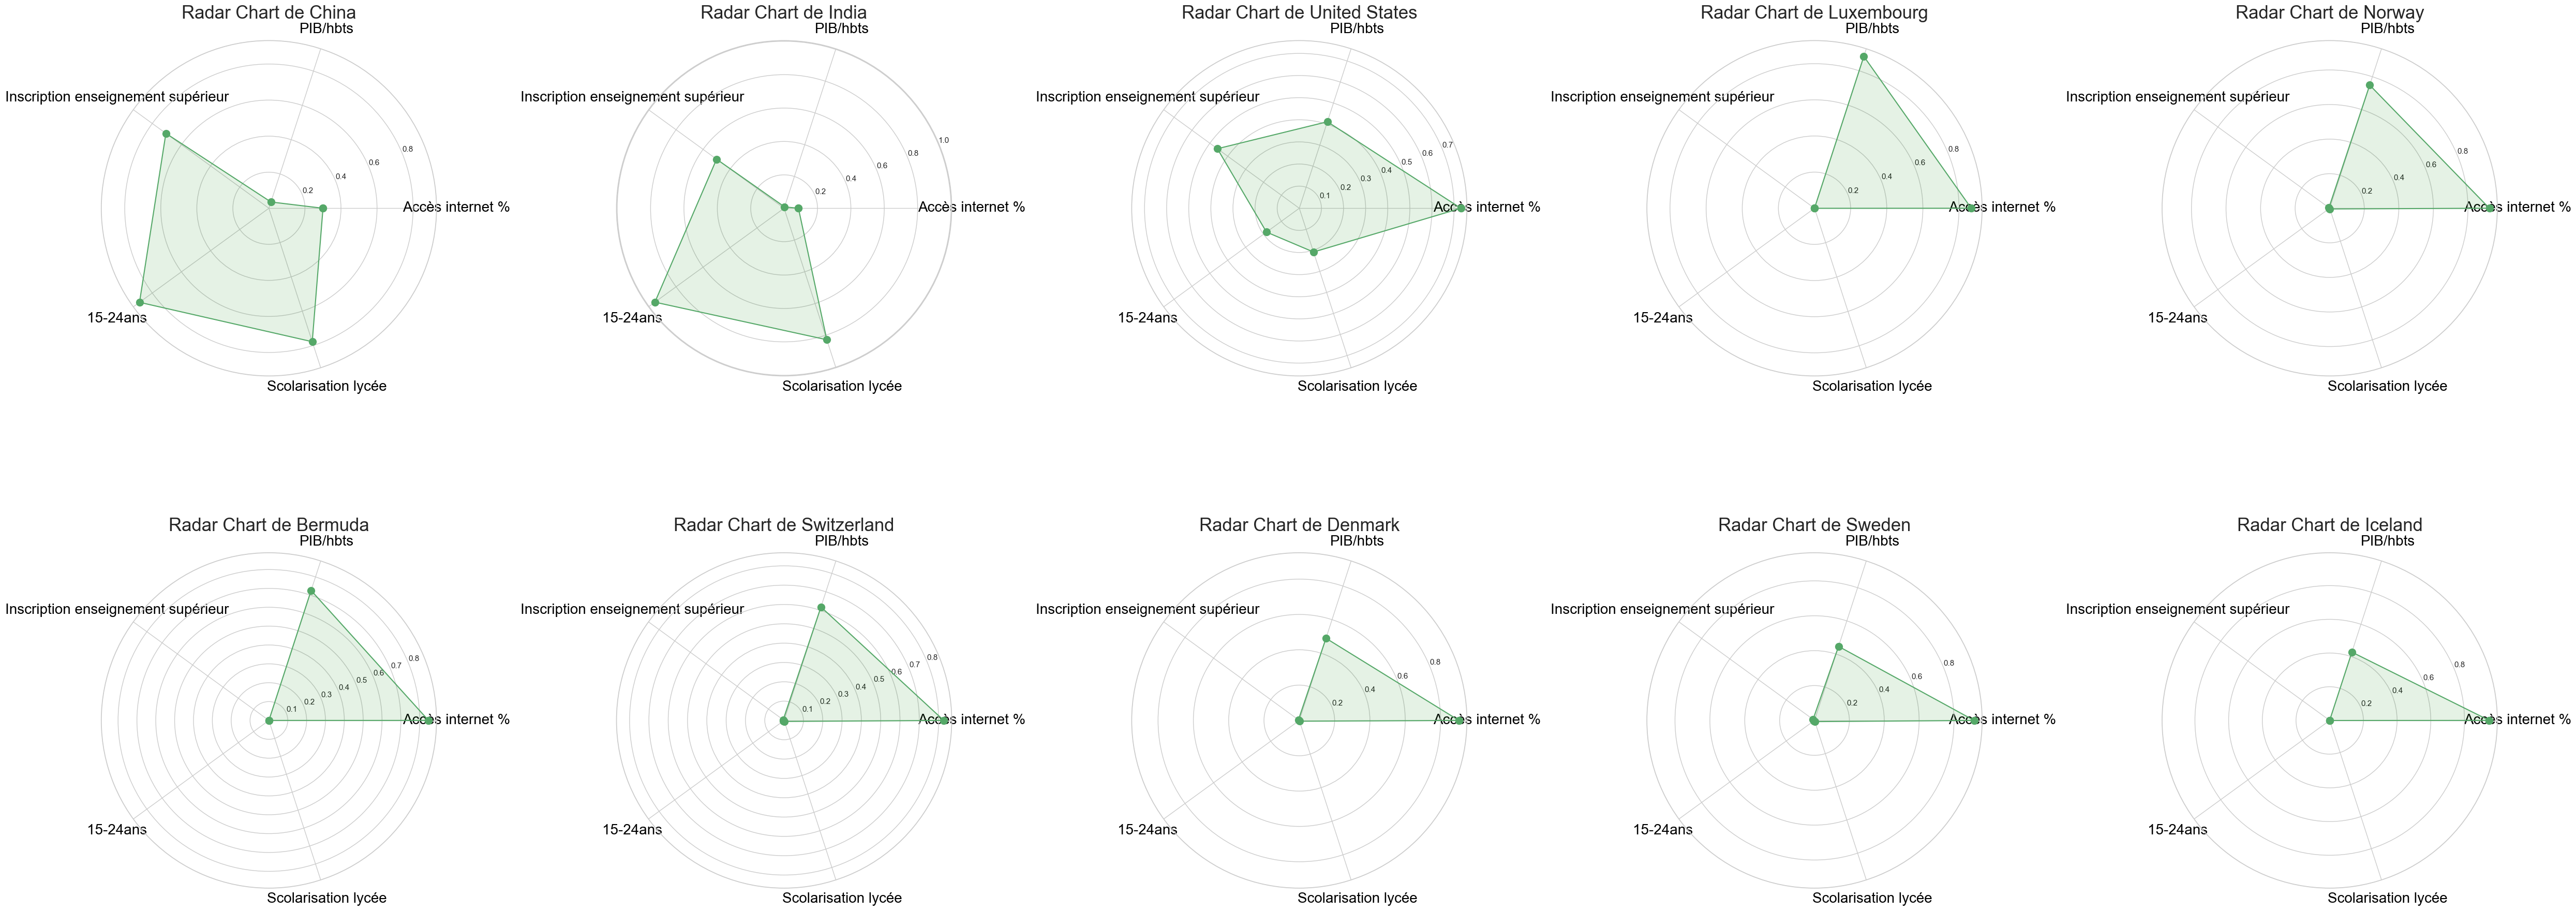

In [80]:
fig = plt.figure(figsize=(50, 20)) 

# Boucle pour créer un graphique en forme de radar pour chaque pays
for i in range(10):
    country_data = df_top10.loc[i]  # Utilisation de .loc pour extraire les données du pays correspondant
    ax = fig.add_subplot(2, 5, i + 1, projection="polar")  

    #les noms des indicateurs comme variables
    variables = indicateurs

    #  les valeurs pour le pays spécifique
    values = country_data[variables].values

    #  le graphique en forme de radar
    values = np.append(values, values[0])

    # Calcule des angles pour les variables
    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Fermer la boucle

    #  le radar chart 
    l1, = ax.plot(angles, values, color="C2", marker="o", label="Valeur", markersize=10)
    ax.fill(angles, values, 'green', alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables, color='black', size=20) 
    ax.tick_params(pad=15)  

    ax.set_title(f"Radar Chart de {country_data['Country Name']}", size=25) 

plt.tight_layout()
plt.show()


# Projection

In [81]:
projection_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,2015,2016,2017,2020,2025,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Sélection des colonnes à fusionner
columns_to_melt2 = projection_data.columns[5:24]

# la fonction melt pour fusionner les colonnes en une colonne "Year"
df2 = pd.melt(projection_data, id_vars= projection_data.columns[:5], value_vars=columns_to_melt2, var_name="Year", value_name="Value")

df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Year,Value
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,2015,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,2015,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,2015,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,2015,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,2015,NaN


In [83]:
indicator = ['Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)',
       'GDP per capita (current US$)', 'Internet users (per 100 people)',
       'Population, ages 15-24, total']

# un  DataFrame filtré contenant uniquement les lignes avec les codes d'indicateurs de la liste
df22 = df2[df2['Indicator Name'].isin(indicator)]

In [84]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22895 entries, 1204 to 16780852
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    22895 non-null  object 
 1   Country Code    22895 non-null  object 
 2   Indicator Name  22895 non-null  object 
 3   Indicator Code  22895 non-null  object 
 4   Region          20330 non-null  object 
 5   Year            22895 non-null  object 
 6   Value           1185 non-null   float64
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


In [85]:
country_names = df_top10['Country Name'].tolist()
print(country_names)

['China', 'India', 'United States', 'Luxembourg', 'Norway', 'Bermuda', 'Switzerland', 'Denmark', 'Sweden', 'Iceland']


In [86]:
# un  DataFrame filtré contenant uniquement sur les pays top 10
df23 = df22[df22['Country Name'].isin(country_names)]
df23.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Year,Value
169794,Bermuda,BMU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,North America,2015,973.00000
169804,Bermuda,BMU,"Enrolment in upper secondary education, both s...",UIS.E.3,North America,2015,NaN
169835,Bermuda,BMU,GDP per capita (current US$),NY.GDP.PCAP.CD,North America,2015,NaN
169965,Bermuda,BMU,Internet users (per 100 people),IT.NET.USER.P2,North America,2015,98.32361
171072,Bermuda,BMU,"Population, ages 15-24, total",SP.POP.1524.TO.UN,North America,2015,NaN


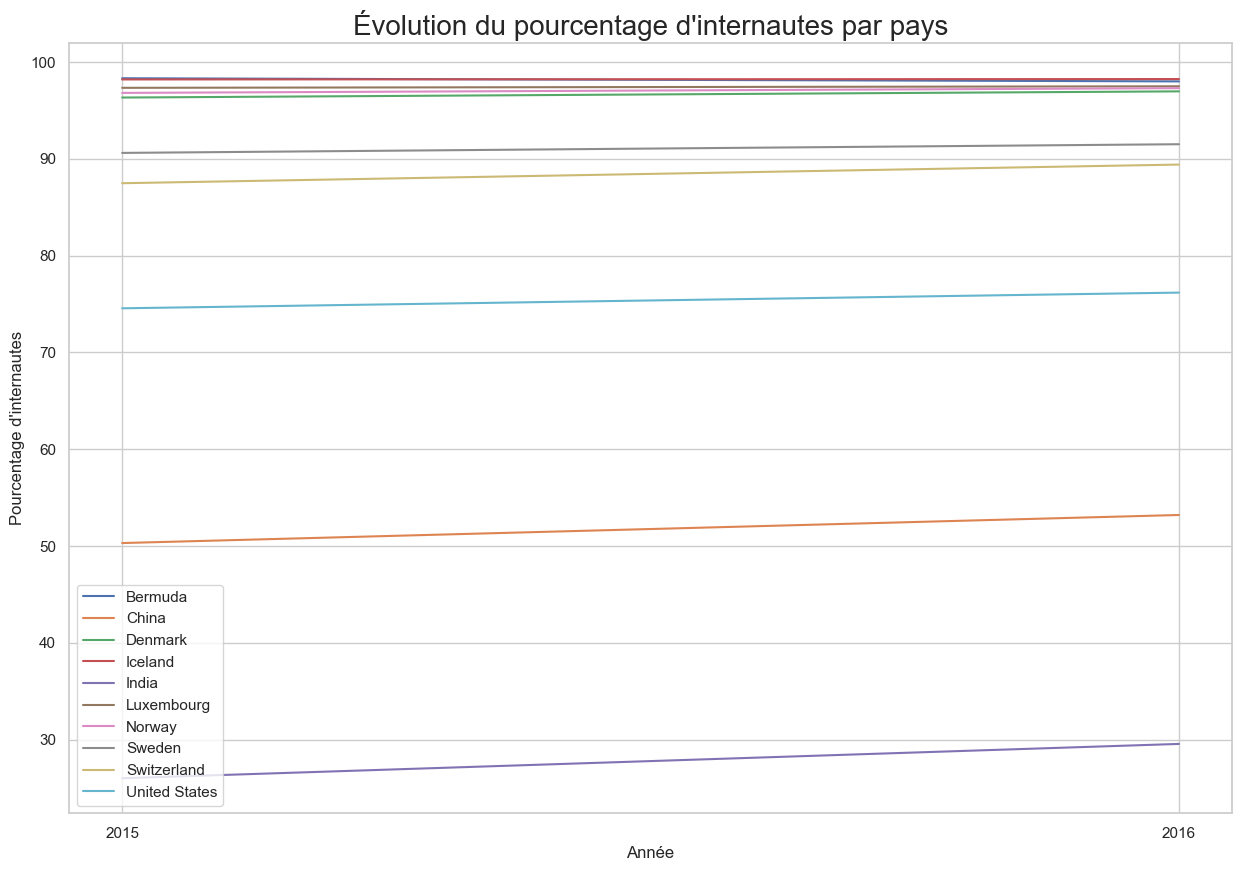

In [87]:
plt.figure(figsize=(15, 10))

# Filtrer directement les données pour l'indicateur et tracer les lignes par pays
data = df23[df23['Indicator Code'] == 'IT.NET.USER.P2']

for country in df23['Country Name'].unique():
    country_data = data[data['Country Name'] == country]
    sns.lineplot(data=country_data, x='Year', y='Value', label=country)

plt.legend(loc='lower left')
plt.title("Évolution du pourcentage d'internautes par pays", size=20)
plt.xlabel('Année')
plt.ylabel('Pourcentage d\'internautes')
plt.show()


Le pourcentage d'internautes a augmenté dans tous les pays représentés sur le graphique.


Le Danemark a enregistré la plus forte augmentation du pourcentage d'internautes, passant de 90% en 2015 à 98% en 2016.
L'Islande a enregistré la deuxième plus forte augmentation du pourcentage d'internautes, passant de 80% en 2015 à 90% en 2016.
Les États-Unis ont enregistré la plus faible augmentation du pourcentage d'internautes, passant de 80% en 2015 à 82% en 2016.
La Chine a enregistré la deuxième plus faible augmentation du pourcentage d'internautes, passant de 95% en 2015 à 97% en 2016

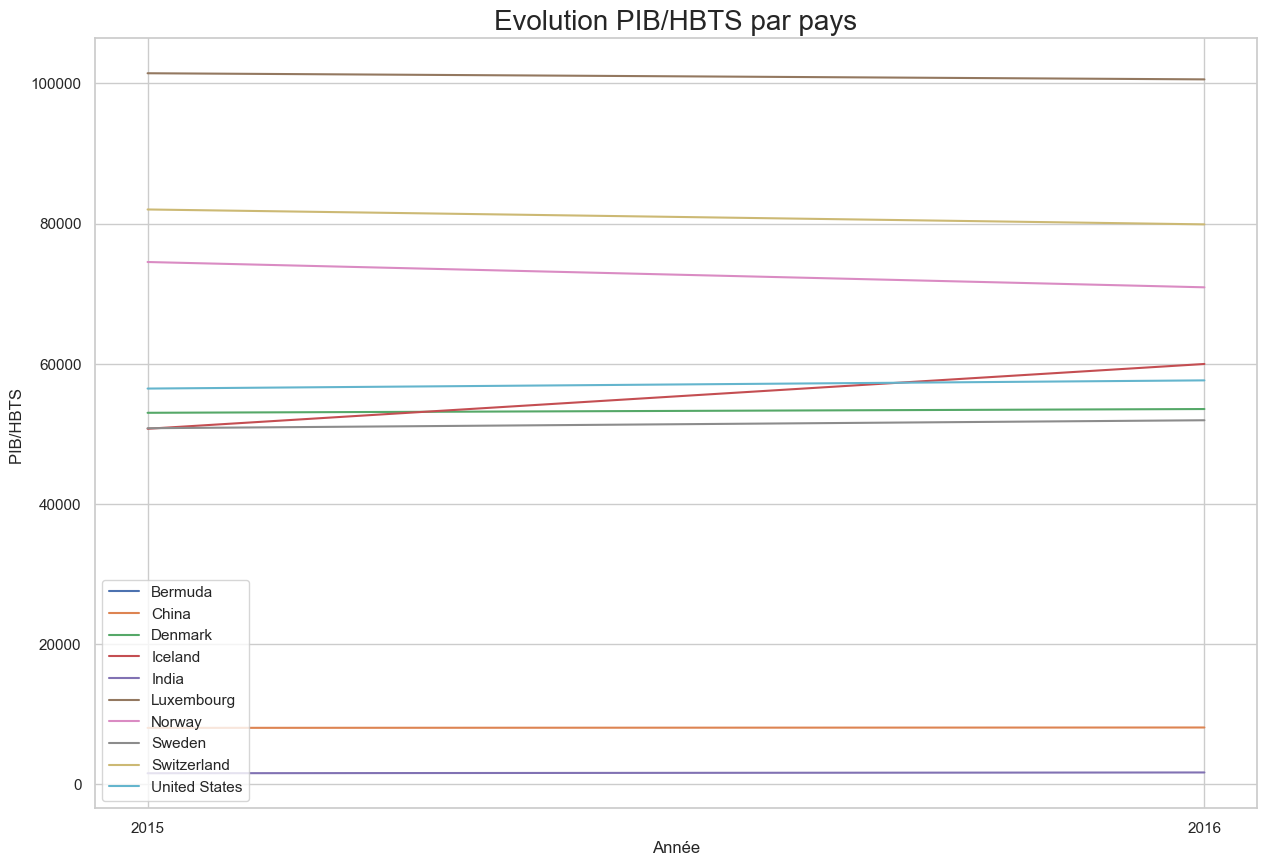

In [89]:
plt.figure(figsize=(15, 10))

# Filtrer directement les données pour l'indicateur et tracer les lignes par pays
data = df23[df23['Indicator Code'] == 'NY.GDP.PCAP.CD']

for country in df23['Country Name'].unique():
    country_data = data[data['Country Name'] == country]
    sns.lineplot(data=country_data, x='Year', y='Value', label=country)

plt.legend(loc='lower left')
plt.title("Evolution PIB/HBTS par pays", size=20)
plt.xlabel('Année')
plt.ylabel('PIB/HBTS ')
plt.show()


Le PIB par habitant a augmenté dans tous les pays représentés sur le graphique.

Le Luxembourg a enregistré la plus forte augmentation du PIB par habitant, passant de 90 000 dollars en 2015 à 100 000 dollars en 2016.
L'Irlande a enregistré la deuxième plus forte augmentation du PIB par habitant, passant de 80 000 dollars en 2015 à 90 000 dollars en 2016.
Les États-Unis ont enregistré la plus faible augmentation du PIB par habitant, passant de 70 000 dollars en 2015 à 72 000 dollars en 2016.
La Chine a enregistré la deuxième plus faible augmentation du PIB par habitant, passant de 60 000 dollars en 2015 à 62 000 dollars en 2016.